#Requirements

In [ ]:
!pip install scikit-learn
!pip install neo4j-driver
!pip install scikit-network
!pip install -U networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 55.2 MB/s eta 0:00:00


#Import

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import community
import pandas as pd
import numpy as np
import sys
import sknetwork as skn
import sklearn as sk
import os
import progressbar
import seaborn as sns
from abc import ABC
from abc import abstractmethod
import torch

import sknetwork as skn
from sklearn.metrics.cluster import normalized_mutual_info_score


%matplotlib inline

# Style pour le Notebook
from IPython.core.display import HTML

def css_styling():
    styles = open("/content/custom.css", "r").read()
    return HTML(styles)
css_styling()


'\ndef css_styling():\n    styles = open("/content/custom.css", "r").read()\n    return HTML(styles)\ncss_styling()\n'

In [ ]:
from networkx.drawing.layout import spring_layout

def plot_graph(G, node_color, colormap="RdBu_r", ax=None):
    dpi = 300
    h,w = 1024,2048

    pos = spring_layout(G, weight="weight")
    #pos = spring_layout(G)


    fig = plt.figure(figsize=(w/dpi,h/dpi),dpi=dpi)
    ax = plt.gca()

    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_nodes(
        G,
        pos,
        node_size=10,
        edgecolors="white",
        node_color=node_color,
        cmap=colormap,
    )

    #nx.draw_networkx_labels(G, pos, font_size=0, font_color="white")

    ax.margins(0.20)
    plt.axis("off")
    plt.show()

#Q2: Social Network Analysis with the Facebook100 Dataset

In [ ]:
def prilim_plot(G):
  node_degree = list(dict(G.degree()).values())
  node_color = (np.array(node_degree) - np.mean(node_degree))/np.std(node_degree)
  plot_graph(G, node_color=node_color)

  return node_degree

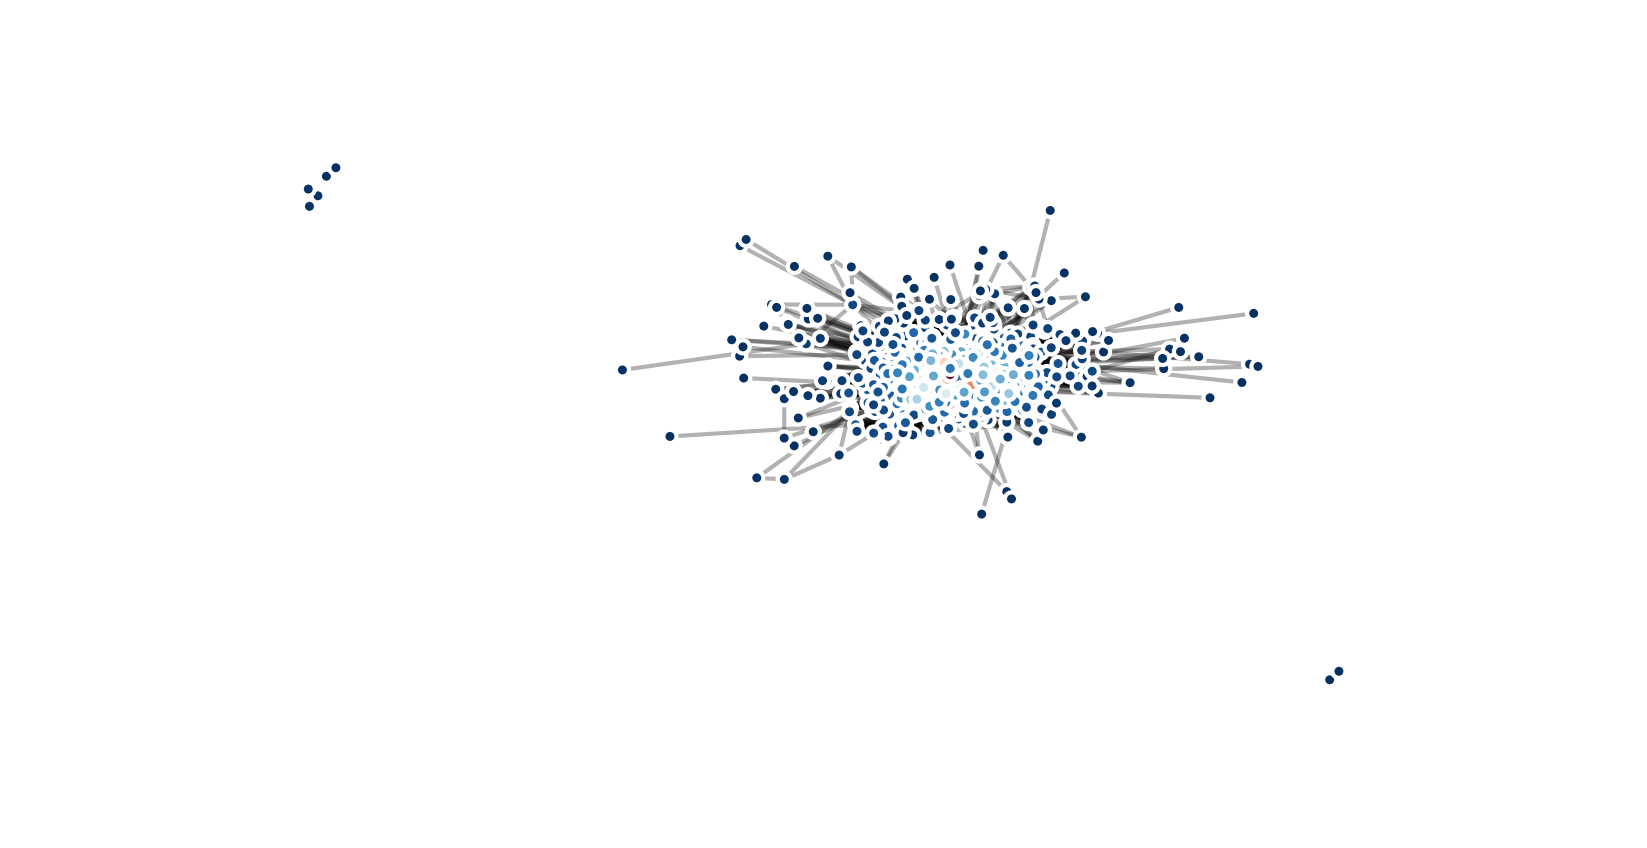

In [ ]:
G_caltech = nx.read_gml('/content/Caltech36.gml')
node_degree_Caltech = prilim_plot(G_caltech)


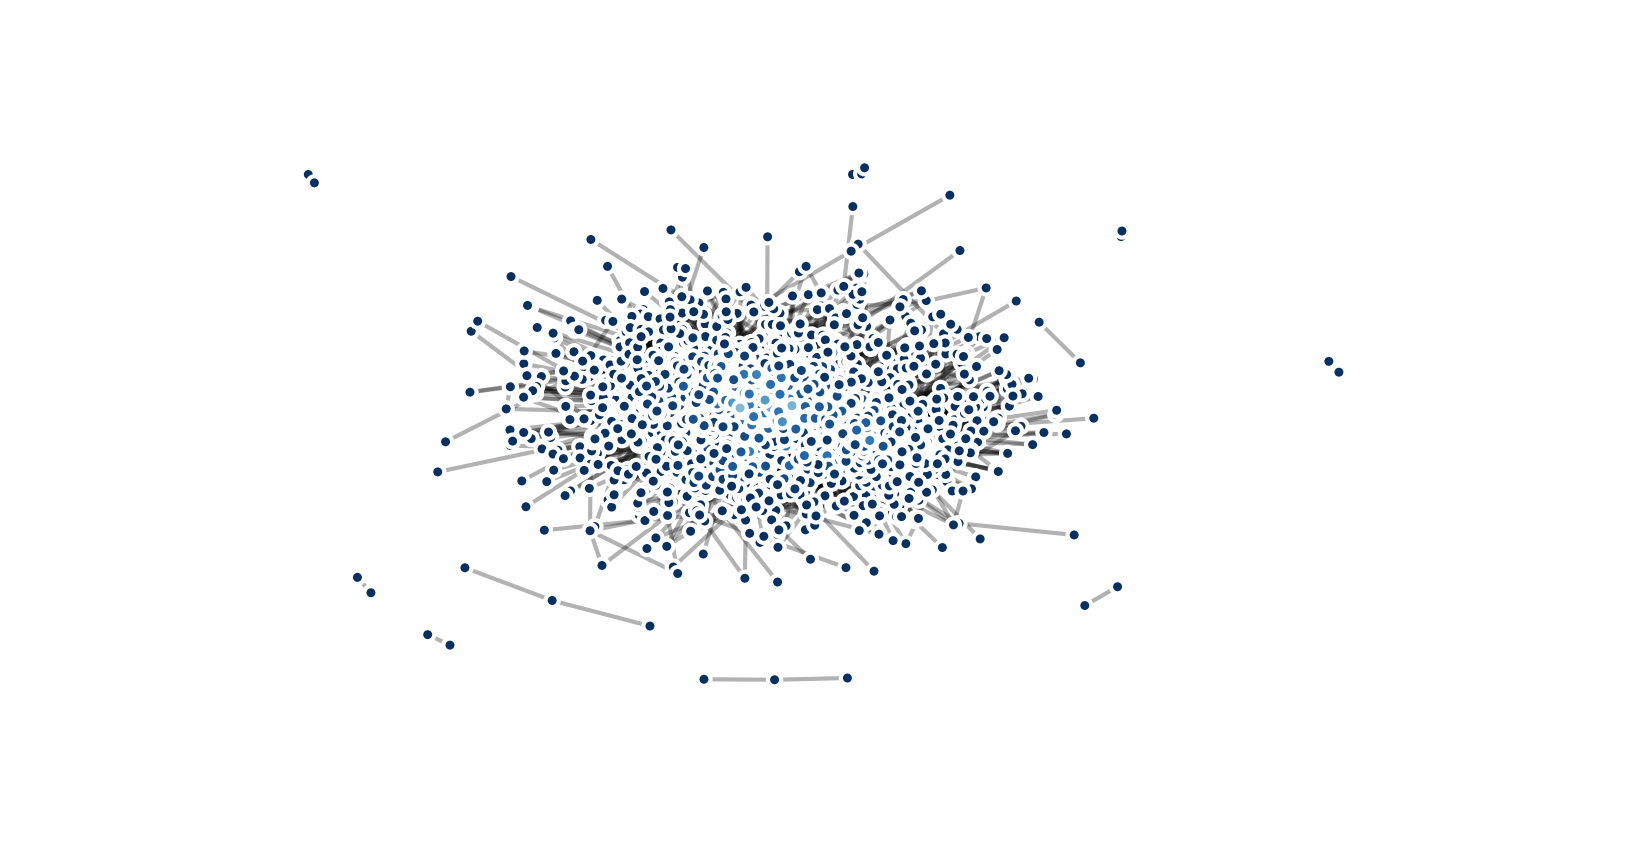

In [ ]:
G_JH = nx.read_gml('/content/Johns Hopkins55.gml')
node_degree_JH = prilim_plot(G_JH)

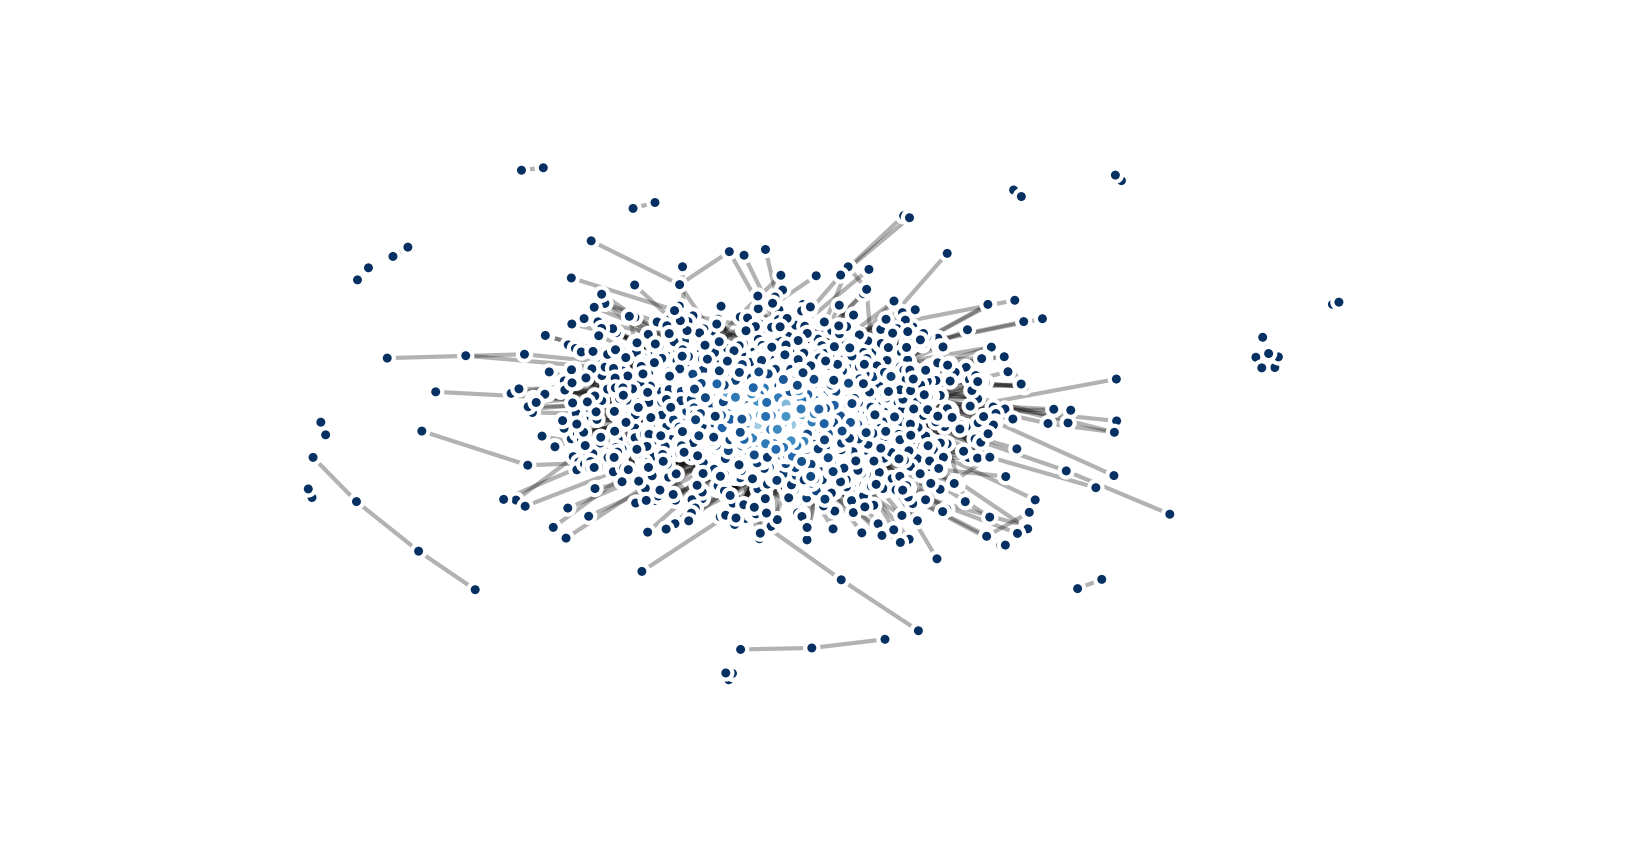

In [ ]:
G_MIT = nx.read_gml('/content/MIT8.gml')
node_degree_MIT = prilim_plot(G_MIT)

In [ ]:
print(f'Number of nodes in Caltech: {G_caltech.number_of_nodes()}')
print(f'Number of nodes in Johns Hopkins: {G_JH.number_of_nodes()}')
print(f'Number of nodes in MIT: {G_MIT.number_of_nodes()}')

print(f'Number of edges in Caltech: {G_caltech.number_of_edges()}')
print(f'Number of edges in Johns Hopkins: {G_JH.number_of_edges()}')
print(f'Number of edges in MIT: {G_MIT.number_of_edges()}')


Number of nodes in Caltech: 769
Number of nodes in Johns Hopkins: 5180
Number of nodes in MIT: 6440
Number of edges in Caltech: 16656
Number of edges in Johns Hopkins: 186586
Number of edges in MIT: 251252


## Degree Distributions

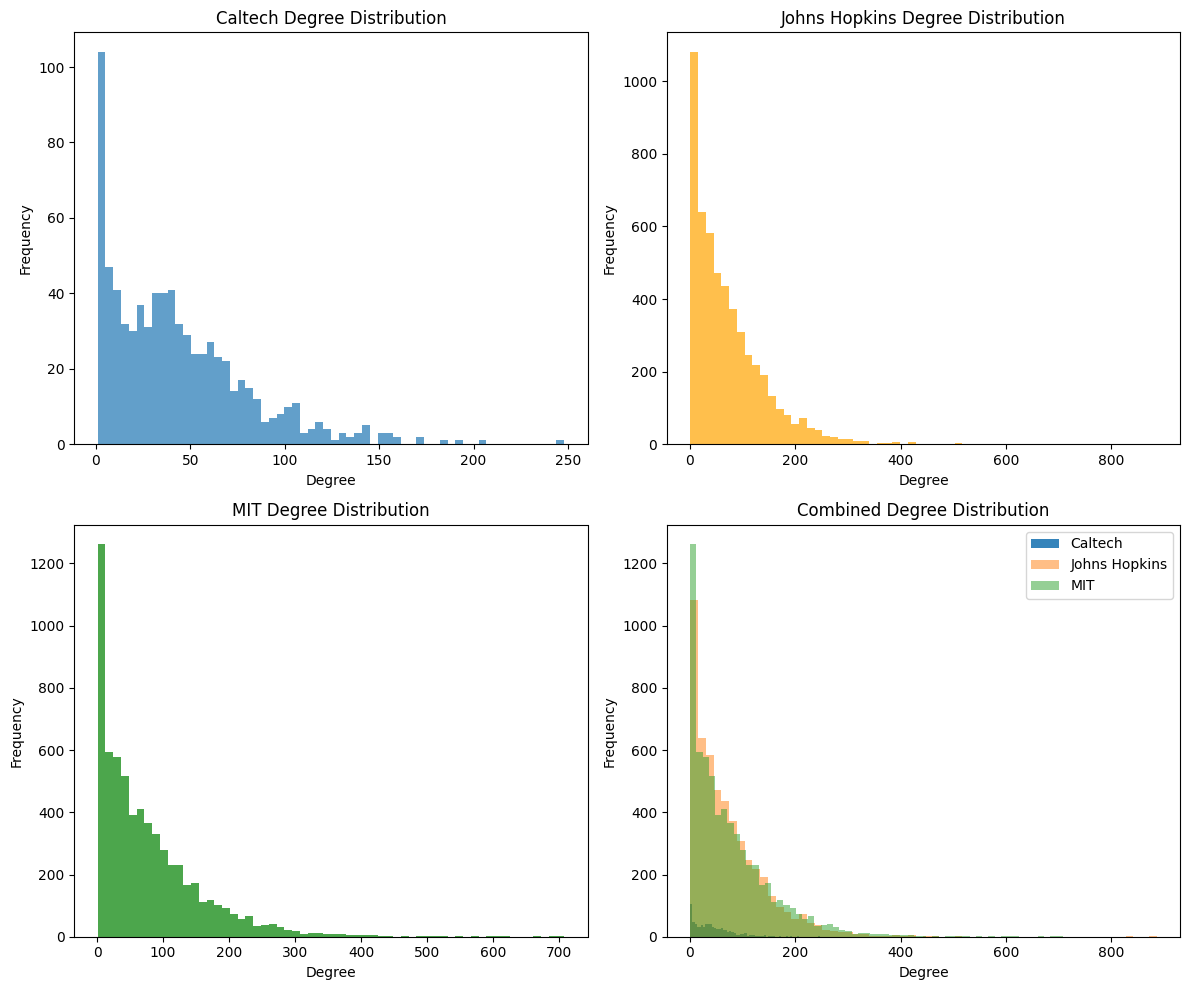

In [ ]:
#Plot the histograms of the network degree

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.hist(node_degree_Caltech, bins=60, alpha=0.7)
plt.title("Caltech Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)
plt.hist(node_degree_JH, bins=60, color='orange', alpha=0.7)
plt.title("Johns Hopkins Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3)
plt.hist(node_degree_MIT, bins=60, color='green', alpha=0.7)
plt.title("MIT Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4)
plt.hist(node_degree_Caltech, bins=60, alpha=0.9, label="Caltech")
plt.hist(node_degree_JH, bins=60, alpha=0.5, label="Johns Hopkins")
plt.hist(node_degree_MIT, bins=60, alpha=0.5, label="MIT")
plt.title("Combined Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

##Clustering Coefficients

In [ ]:
Global_cluster_Caltech = nx.average_clustering(G_caltech)
Global_cluster_JH = nx.average_clustering(G_JH)
Global_cluster_MIT = nx.average_clustering(G_MIT)

local_cluster_Caltech = nx.clustering(G_caltech)
local_cluster_JH = nx.clustering(G_JH)
local_cluster_MIT = nx.clustering(G_MIT)

In [ ]:
print("Global clustering coefficient for Caltech:", Global_cluster_Caltech)
print("Global clustering coefficient for Johns Hopkins:", Global_cluster_JH)
print("Global clustering coefficient for MIT:", Global_cluster_MIT)

Global clustering coefficient for Caltech: 0.40929439048517224
Global clustering coefficient for Johns Hopkins: 0.26839307371293514
Global clustering coefficient for MIT: 0.271218741950132


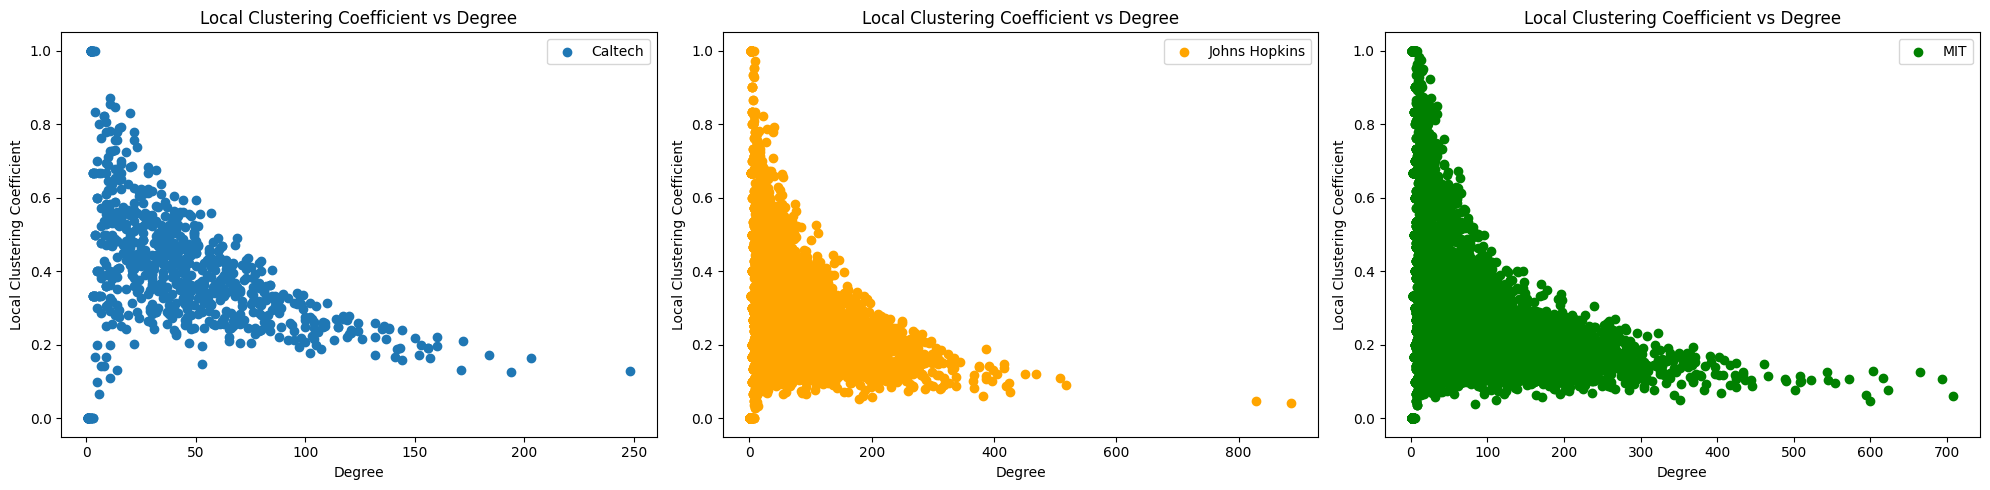

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(node_degree_Caltech, list(local_cluster_Caltech.values()), label='Caltech')
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('Local Clustering Coefficient vs Degree')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(node_degree_JH, list(local_cluster_JH.values()), label='Johns Hopkins', color='orange')
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('Local Clustering Coefficient vs Degree')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(node_degree_MIT, list(local_cluster_MIT.values()), label='MIT', color='green')
plt.xlabel('Degree')
plt.ylabel('Local Clustering Coefficient')
plt.title('Local Clustering Coefficient vs Degree')
plt.legend()



plt.tight_layout()
plt.show()

In [ ]:
edge_density_Caltech = nx.density(G_caltech)
edge_density_JH = nx.density(G_JH)
edge_density_MIT = nx.density(G_MIT)

print("Edge density for Caltech:", edge_density_Caltech)
print("Edge density for Johns Hopkins:", edge_density_JH)
print("Edge density for MIT:", edge_density_MIT)

Edge density for Caltech: 0.05640442132639792
Edge density for Johns Hopkins: 0.013910200162372396
Edge density for MIT: 0.012118119495041378


In [ ]:
LCC_Caltech = G_caltech.subgraph(max(nx.connected_components(G_caltech), key=len))
average_path_length_caltech = nx.average_shortest_path_length(LCC_Caltech)
print("Average shortest path length for Caltech:", average_path_length_caltech)

LCC_JH = G_JH.subgraph(max(nx.connected_components(G_JH), key=len))
average_path_length_JH = nx.average_shortest_path_length(LCC_JH)
print("Average shortest path length for Johns Hopkins:", average_path_length_JH)

LCC_MIT = G_MIT.subgraph(max(nx.connected_components(G_MIT), key=len))
average_path_length_MIT = nx.average_shortest_path_length(LCC_MIT)
print("Average shortest path length for MIT:", average_path_length_MIT)

Average shortest path length for Caltech: 2.3378480449470755
Average shortest path length for Johns Hopkins: 2.710212139442153
Average shortest path length for MIT: 2.7202753728586515


#Q3: Assortativity Analysis with the Facebook100 Dataset

In [ ]:
# Getting the name string of the attributes in the graphs
first_node_caltech = list(G_caltech.nodes())[0]

print(f"Attributes of node '{first_node_caltech}' in G_caltech:")
print(G_caltech.nodes[first_node_caltech])

Attributes of node '0' in G_caltech:
{'student_fac': 1, 'gender': 1, 'major_index': 199, 'second_major': 0, 'dorm': 169, 'year': 2008, 'high_school': 3387}


In [ ]:
# Getting the name string of the attributes in the graphs
all_attribute_names = set()
for node, data in G_caltech.nodes(data=True):
    for attr_name in data.keys():
        all_attribute_names.add(attr_name)

print("All unique node attribute names in G_caltech:")
print(list(all_attribute_names))

All unique node attribute names in G_caltech:
['year', 'dorm', 'gender', 'major_index', 'high_school', 'student_fac', 'second_major']


In [ ]:
def assortativity_analysis(directory_path):
    '''
    This function calculates the assortativity coefficient for degree, strudent_fac, major_index,
    dorm, and gender attributes for all the networks in the database.
    Args:
    directory_path (str): the path to the directory containing the all the GML files.
    Returns:
    assortativity_results (dict): a dictionary containing the assortativity coefficient for each network.

    '''
    assortativity_results = {}

    # Iterate over all files in the given directory
    files = [f for f in os.listdir(directory_path) if f.endswith('.gml')]
    for filename in progressbar.progressbar(files, prefix="Processing GML files: "):
        file_path = os.path.join(directory_path, filename)
        try:
            G = nx.read_gml(file_path)

            # Calculate Assortativity for the attributes
            degree_assort = nx.degree_assortativity_coefficient(G)
            student_fac_assort = nx.attribute_assortativity_coefficient(G, 'student_fac')
            major_index_assort = nx.attribute_assortativity_coefficient(G, 'major_index')
            dorm_assort        = nx.attribute_assortativity_coefficient(G, 'dorm')
            gender_assort      = nx.attribute_assortativity_coefficient(G, 'gender')

            assortativity_results[filename] = {
                'size' : nx.number_of_nodes(G),
                'degree_assortativity': degree_assort,
                'student_fac_assortativity': student_fac_assort,
                'major_index_assortativity': major_index_assort,
                'dorm_assortativity': dorm_assort,
                'gender_assortativity': gender_assort
            }

        except Exception as e:
            print(f"  Error processing {filename}: {e}")
    return assortativity_results


In [ ]:
def assort_analysis_plots(size, attribute, attribute_name):

  '''
  This function plots the assotrtativity coeffcient vs size for a given attribute for all the networks,
  Along with the histogram of the assotrtativity coeffcient for the given attribute.
  Args:
  size (list): a list of network sizes (for all the networks).
  attribute (list): a list of assortativity coefficients for the given attribute.
  attribute_name (str): the name of the attribute to plot.

  '''

  plt.figure(figsize=(15, 6))

  # Scatter plot of attribute vs. size
  plt.subplot(1, 2, 1)
  ax1 = plt.gca()
  ax1.scatter(size, attribute)
  ax1.set_xscale('log')
  ax1.set_title(f"{attribute_name} vs Size")
  ax1.set_ylabel(attribute_name)
  ax1.set_xlabel("Size")
  #assortativity = 0
  ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Assortativity = 0')
  ax1.legend()

  # Distribution: Histogram of attribute with KDE fit
  plt.subplot(1, 2, 2)
  ax2 = plt.gca()
  sns.histplot(attribute, bins=30, kde=True, ax=ax2, color='skyblue',
               stat='density', label='Histogram with KDE')

  ax2.set_title(f"{attribute_name} Distribution with KDE Fit")
  ax2.set_xlabel(attribute_name)
  ax2.set_ylabel("Density")
  ax2.axvline(0, color='gray', linestyle='--', linewidth=0.8, label='Assortativity = 0')
  ax2.legend()

  plt.tight_layout()
  plt.show()

  print(f'Mean Assortativity = {np.mean(attribute)}')
  print(f'Std Assortativity = {np.std(attribute)}')

In [ ]:
# Calculating the assortativity coefficients for all the netwroks using the defined "assortativity_analysis" function
data_dir = '/content/drive/MyDrive/fb100/data/'
assortativity_results = assortativity_analysis(data_dir)
size = [result['size'] for result in assortativity_results.values()]
degree_assortativity = [result['degree_assortativity'] for result in assortativity_results.values()]
student_fac_assortativity = [result['student_fac_assortativity'] for result in assortativity_results.values()]
major_index_assortativity = [result['major_index_assortativity'] for result in assortativity_results.values()]
dorm_assortativity = [result['dorm_assortativity'] for result in assortativity_results.values()]
gender_assortativity = [result['gender_assortativity'] for result in assortativity_results.values()]


Processing GML files: 100% (100 of 100) || Elapsed Time: 0:48:40 Time:  0:48:40


In [ ]:
import json

# Save the assortativity_results dictionary to a JSON file (for further use)
output_file_path = '/content/assortativity_results.json'
with open(output_file_path, 'w') as f:
    json.dump(assortativity_results, f, indent=4)

print(f"Assortativity results saved to {output_file_path}")

Assortativity results saved to /content/assortativity_results.json


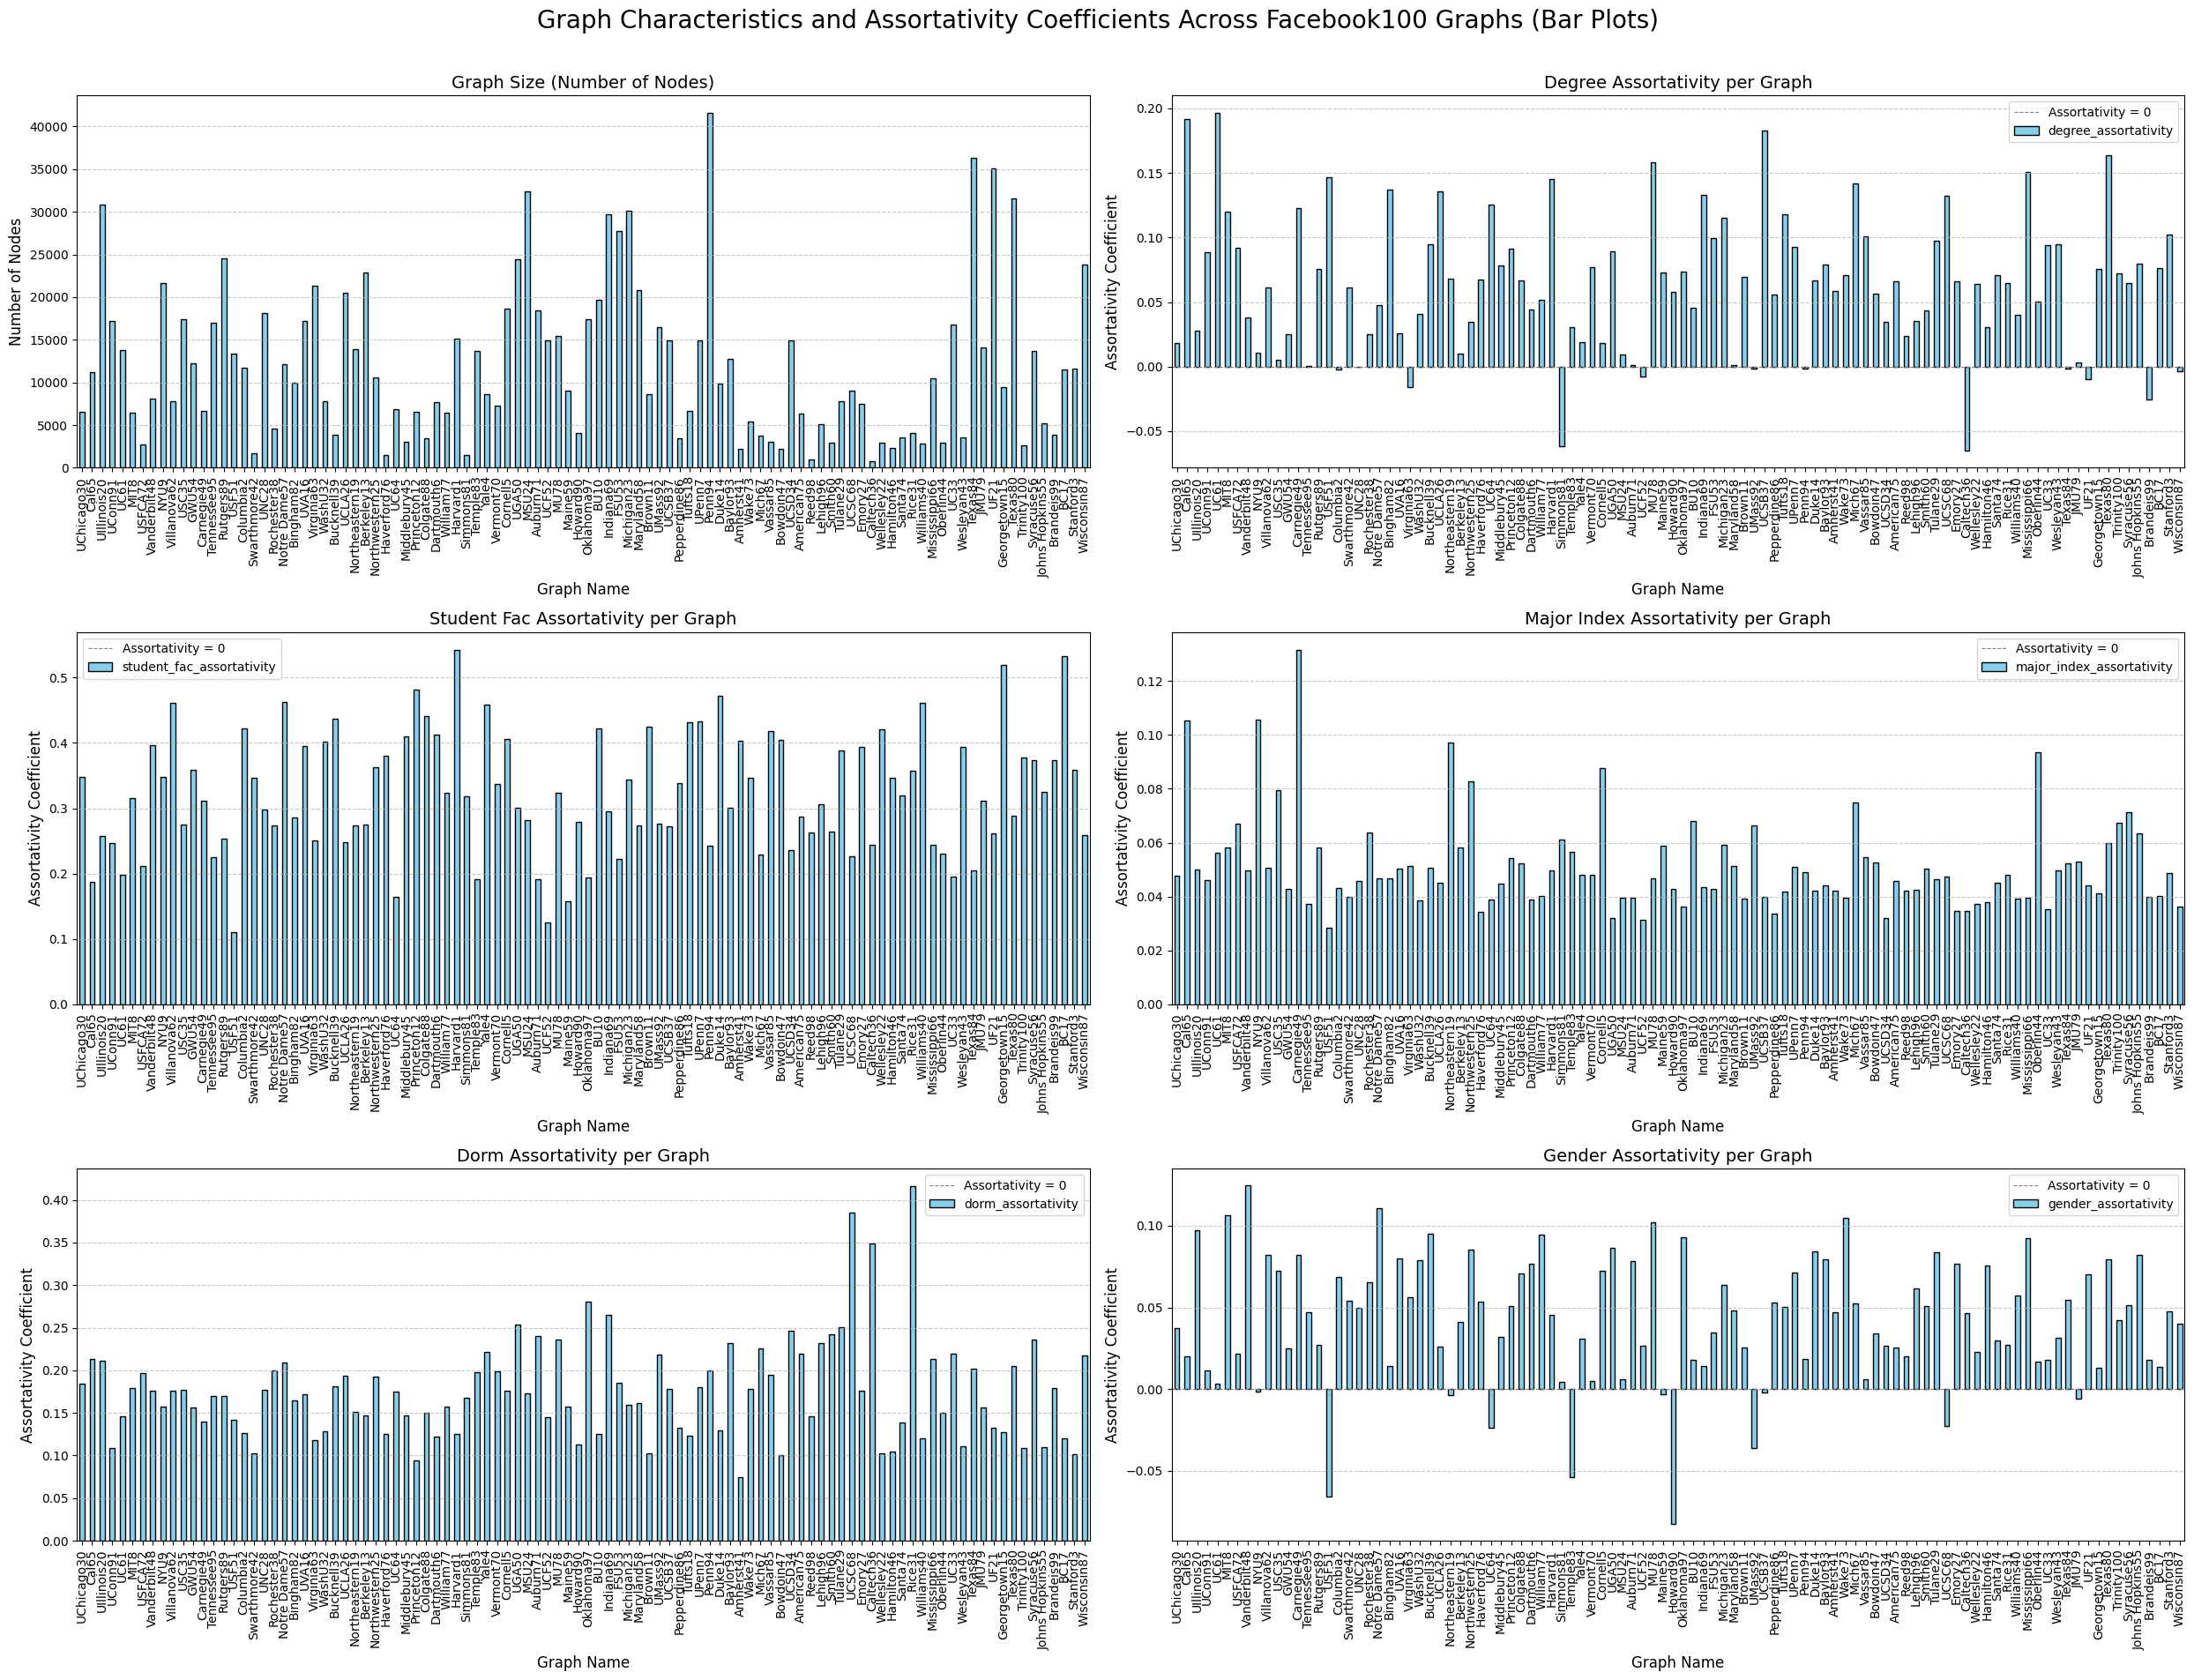

In [ ]:
# Plot the assortativity and size barplots along the networks

# Convert the assortativity_results dictionary to a DataFrame
df_assortativity = pd.DataFrame.from_dict(assortativity_results, orient='index')

# Remove '.gml' from the graph names (for better visualization)
df_assortativity.index = df_assortativity.index.str.replace('.gml', '', regex=False)

# List of attributes to plot
attributes_to_plot = [
    'size',
    'degree_assortativity',
    'student_fac_assortativity',
    'major_index_assortativity',
    'dorm_assortativity',
    'gender_assortativity'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(25, 20))
axes = axes.flatten()

for i, attr in enumerate(attributes_to_plot):
    ax = axes[i]
    # Create a bar plot for the current attribute
    df_assortativity[attr].plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

    title = f'{attr.replace("_", " ").title()} per Graph'
    if attr == 'size':
        title = 'Graph Size (Number of Nodes)'
        ax.set_ylabel('Number of Nodes', fontsize=12)
    else:
        ax.set_ylabel('Assortativity Coefficient', fontsize=12)

    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Graph Name', fontsize=12)

    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

    # Add reference line at 0 for assortativity plots
    if attr != 'size':
        ax.axhline(0, color='gray', linestyle='--', linewidth=0.8, label='Assortativity = 0')
        ax.legend(fontsize=10)

    ax.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Graph Characteristics and Assortativity Coefficients Across Facebook100 Graphs (Bar Plots)', y=0.98, fontsize=20)
plt.show()

## based on Degree

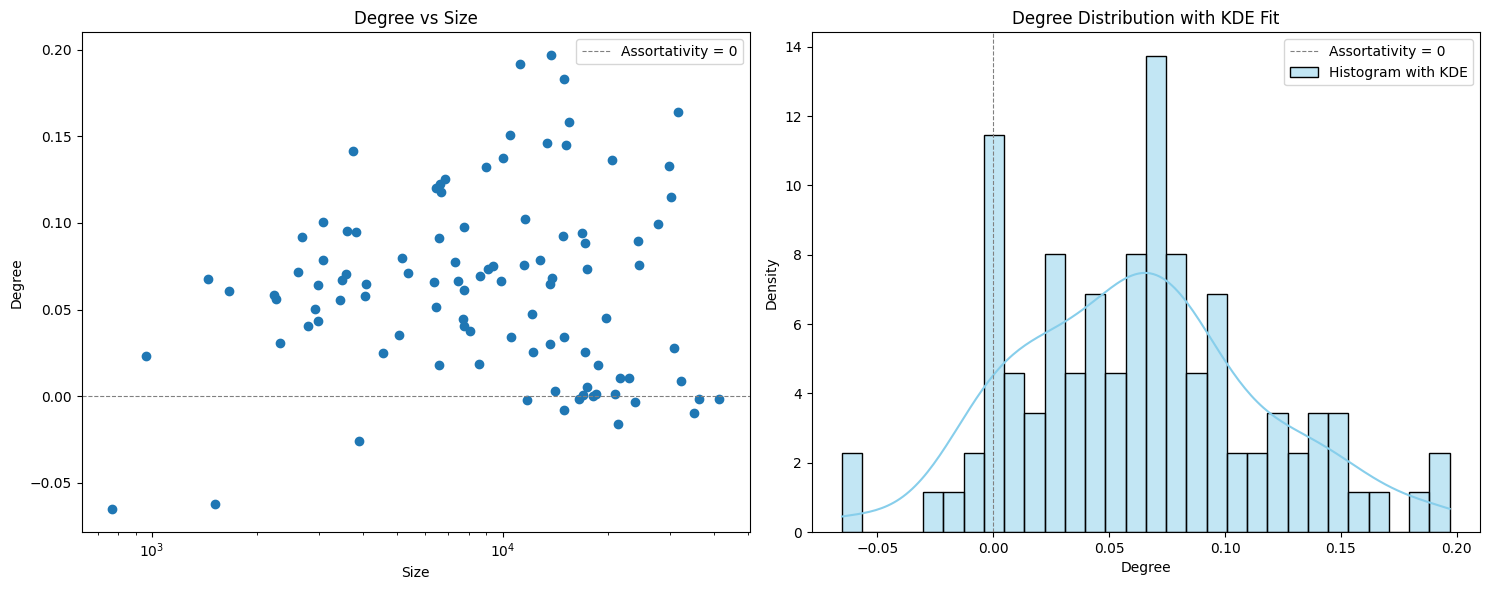

Mean Assortativity = 0.06264795282554284
Std Assortativity = 0.052580376941639126


In [ ]:
# Use the defined "assort_analysis_plots" to plot the assortativity vs network size and the assortativity distribution
assort_analysis_plots(size, degree_assortativity, 'Degree')

## based on student/faculty status

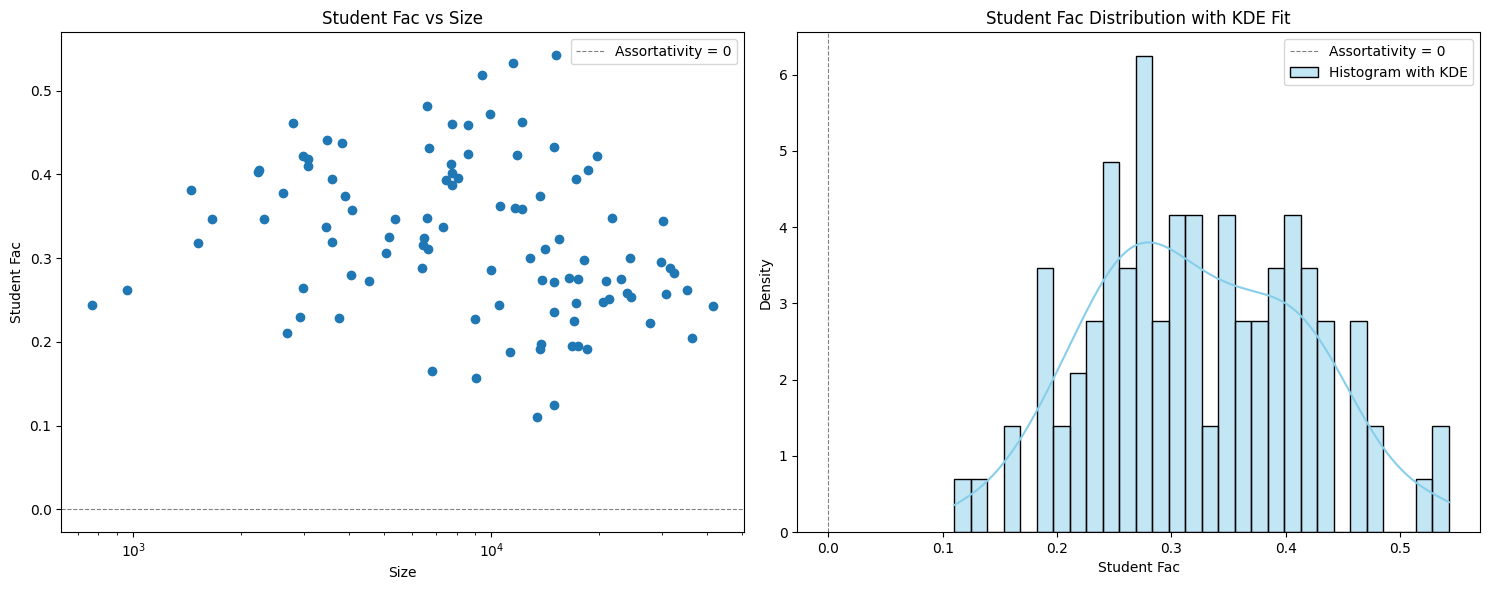

Mean Assortativity = 0.32273815859121513
Std Assortativity = 0.09204436016546744


In [ ]:
assort_analysis_plots(size, student_fac_assortativity, 'Student Fac')

## based on Major

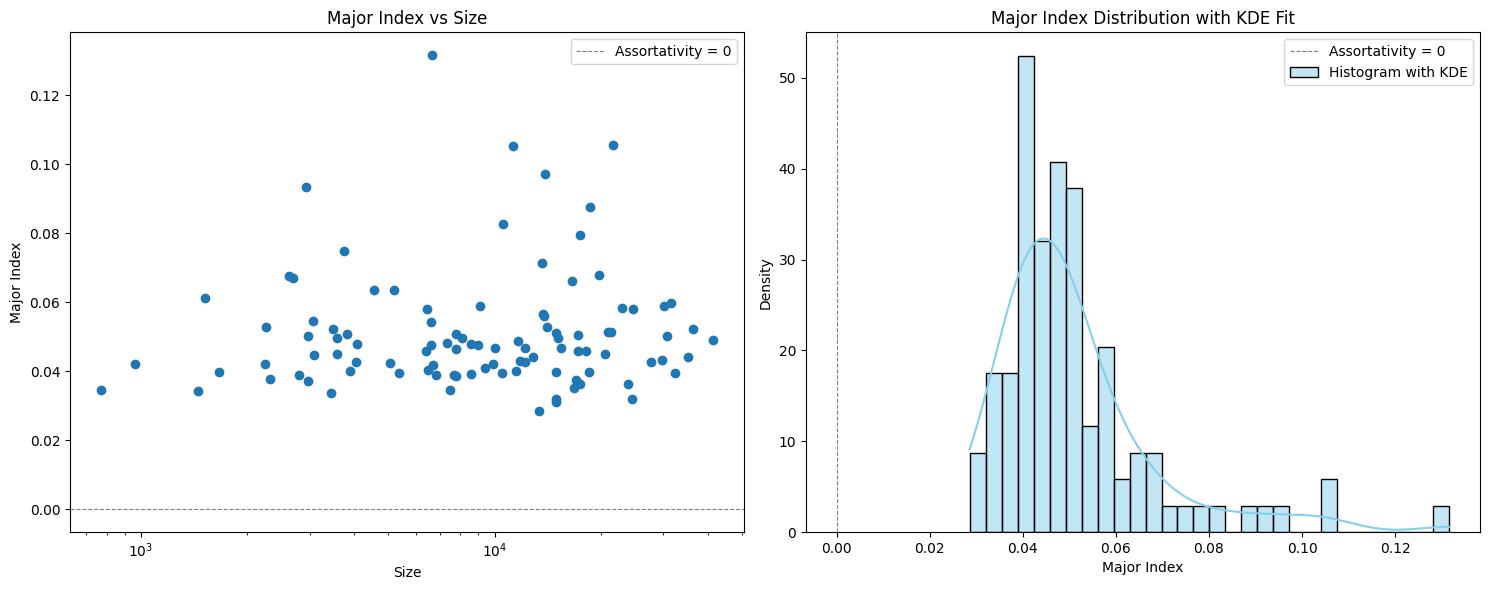

Mean Assortativity = 0.051114943318787784
Std Assortativity = 0.017174950234959473


In [ ]:
assort_analysis_plots(size, major_index_assortativity, 'Major Index')

## based on Dorm

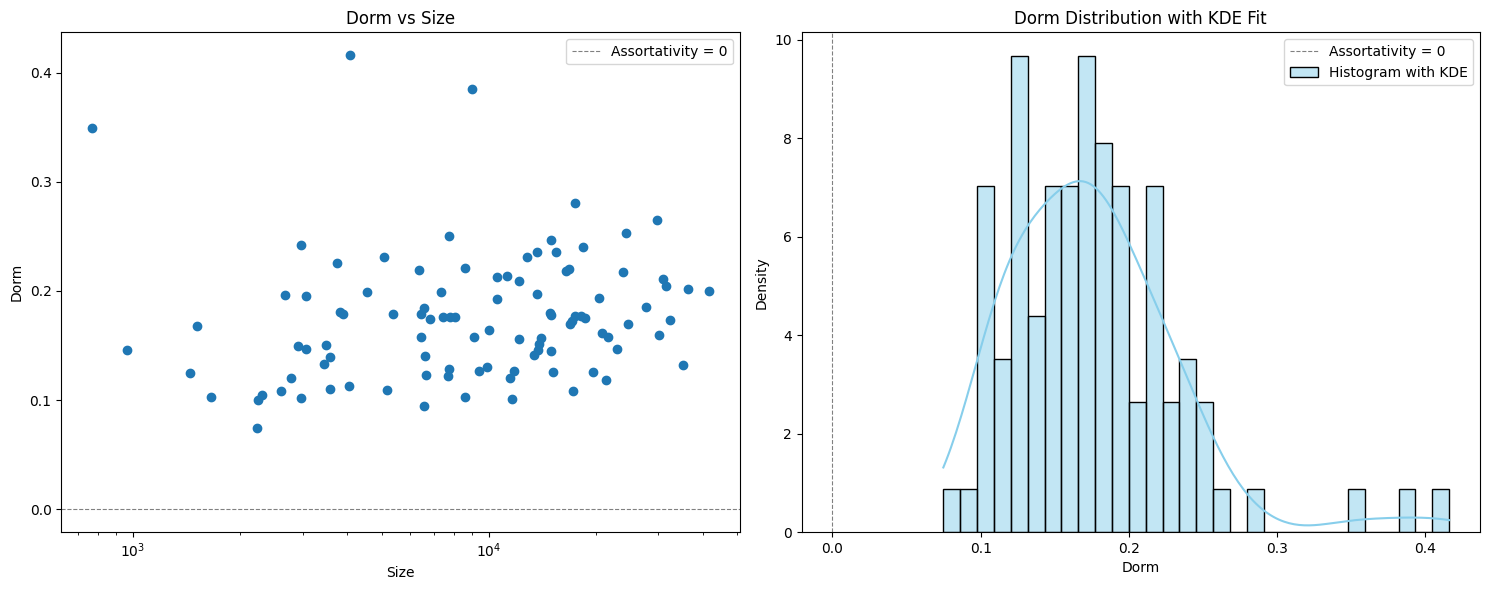

Mean Assortativity = 0.1751058285817566
Std Assortativity = 0.05744381440028947


In [ ]:
assort_analysis_plots(size, dorm_assortativity, 'Dorm')

## based on Gender

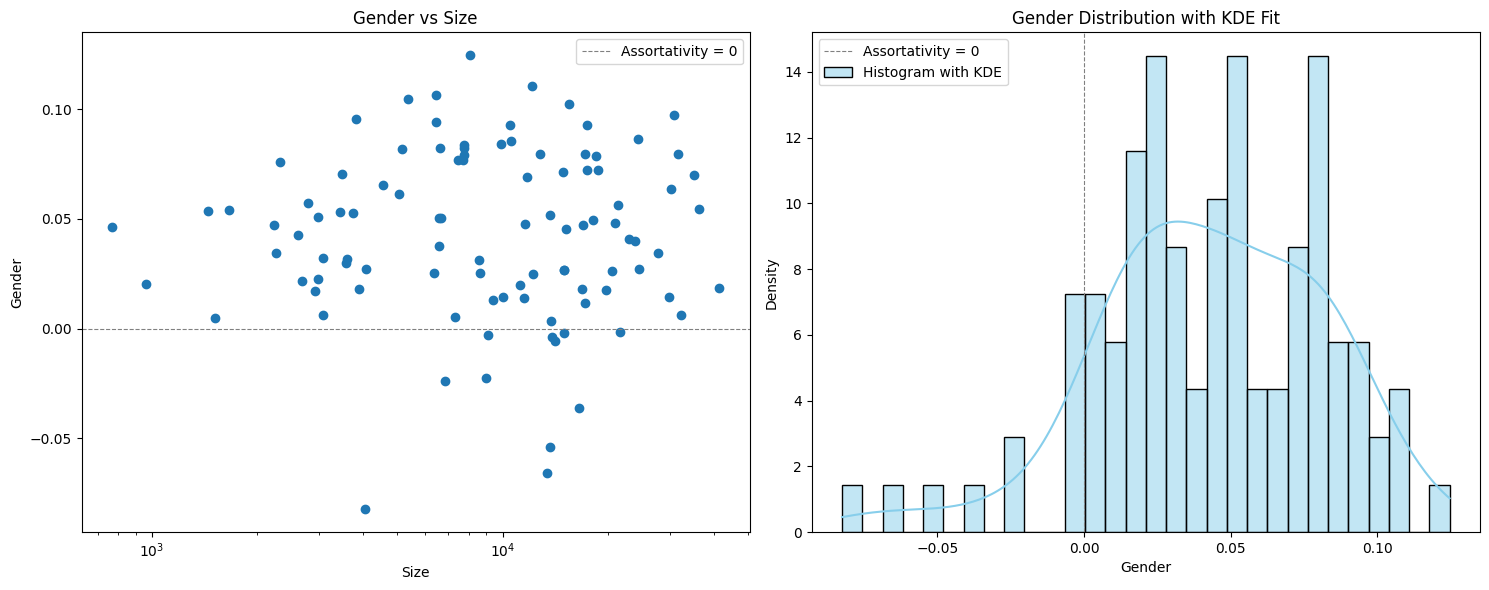

Mean Assortativity = 0.0429581108480395
Std Assortativity = 0.038375347017294496


In [ ]:
assort_analysis_plots(size, gender_assortativity, 'Gender')

#Q4: Link prediction

In [ ]:
class LinkPrediction(ABC) :
  '''
  This is the abstract class that was defined in the question, it is completed as follows
  for 3 metrics: Common Neighbors, Adamic Adar, and Jacard.
  '''
  def __init__ (self, graph):
    '''
    Constructor
    Parameters
      graph: Networkx graph
    '''
    self.graph = graph
    # Get a sorted list of node labels and map them to integer indices for matrix creation
    self.nodes_list = sorted(list(graph.nodes()))
    self.N = len(self.nodes_list)
    self.node_to_idx = {node: i for i, node in enumerate(self.nodes_list)}

  def neighbors (self, v_label):
    '''
    Return the neighbors list of a node using its actual label.
    Parameters
      v_label: (str or int) node label
    Return
      neighbors_list: python list of neighbor labels
    '''
    neighbors_list = self.graph.neighbors(v_label)
    return list(neighbors_list)

  @abstractmethod
  def fit (self):
    '''
    Abstract method is implemented by subclasses below.
    Calculates and returns a N x N score matrix.
    '''
    pass

class CommonNeighbors(LinkPrediction) :
  def __init__(self, graph):
    super(CommonNeighbors, self).__init__(graph)

  def fit(self):
    scores = np.zeros((self.N, self.N))
    for v_label in self.nodes_list:
      v_idx = self.node_to_idx[v_label]
      neighbors_v = self.neighbors(v_label)
      for u_label in self.nodes_list:
        u_idx = self.node_to_idx[u_label]
        if v_label == u_label: # A node cannot be its own neighbor
            continue
        neighbors_u = self.neighbors(u_label)
        scores[v_idx, u_idx] = len(set(neighbors_v).intersection(neighbors_u))
    return scores

class Adamic_adar(LinkPrediction) :
  def __init__(self, graph):
    super(Adamic_adar, self).__init__(graph)

  def fit(self):
    scores = np.zeros((self.N, self.N))
    for v_label in self.nodes_list:
      v_idx = self.node_to_idx[v_label]
      neighbors_v = self.neighbors(v_label)
      for u_label in self.nodes_list:
        u_idx = self.node_to_idx[u_label]
        if v_label == u_label: # A node cannot be its own neighbor
            continue
        common_neighbors_labels = set(neighbors_v).intersection(self.neighbors(u_label))
        scores[v_idx, u_idx] = sum([1/np.log(len(self.neighbors(w_label)) + 1e-6) for w_label in common_neighbors_labels])
    return scores

class Jacard(LinkPrediction) :
  def __init__(self, graph):
    super(Jacard, self).__init__(graph)

  def fit(self):
    scores = np.zeros((self.N, self.N))
    for v_label in self.nodes_list:
      v_idx = self.node_to_idx[v_label]
      neighbors_v = self.neighbors(v_label)
      for u_label in self.nodes_list:
        u_idx = self.node_to_idx[u_label]
        if v_label == u_label: # A node cannot be its own neighbor
            continue
        neighbors_u = self.neighbors(u_label)
        intersection_size = len(set(neighbors_v).intersection(neighbors_u))
        union_size = len(set(neighbors_v).union(neighbors_u))
        if union_size == 0:
            scores[v_idx, u_idx] = 0 # Avoid division by zero if both nodes have no neighbors
        else:
            scores[v_idx, u_idx] = intersection_size / union_size
    return scores

In [ ]:
data_dir = '/content/drive/MyDrive/fb100/data/'
G_caltech = nx.read_gml(data_dir+'Caltech36.gml')

In [ ]:
def remove_random_edges(graph, fraction):
    '''
    This function removes a specified fraction of edges randomly from a graph.
    Args:
    graph (networkx.Graph): The input graph from which edges will be removed.
    fraction (float): The fraction of edges to remove.
    Returns:
    graph (networkx.Graph): The modified graph with the specified number of edges removed.
    removed_edge (list): A list of tuples representing the removed edges.

    '''
    num_edges_to_remove = int(len(graph.edges()) * fraction)
    all_edges = list(graph.edges())
    np.random.shuffle(all_edges)
    edges_to_remove = all_edges[:num_edges_to_remove]
    graph.remove_edges_from(edges_to_remove)
    return graph, edges_to_remove


In [ ]:
def get_top_k_predictions(k, method, G_test):

  '''
  This function predicts the link using the specified method and returns the top k predictions.
  Args:
  k (int): The number of top predictions to return.
  method (str): The method used for link prediction ('common_neighbors', 'adamic_adar', or 'jacard').
  G_test (networkx.Graph): The test graph for link prediction.
  Returns:
  list_of_tuples_nodes (list): A list of tuples representing the top k predicted links.

  '''

  if method == 'common_neighbors':
    method_obj = CommonNeighbors(G_test)
  elif method == 'adamic_adar':
    method_obj = Adamic_adar(G_test)
  elif method == 'jacard':
    method_obj = Jacard(G_test)

  nodes_list = method_obj.nodes_list
  scores_jacard = method_obj.fit()

  # descending sorting the scores
  flat_indices_sorted = np.argsort(scores_jacard.flatten())[::-1]

  top_k_jacard_pairs_with_scores = []
  list_of_tuples_nodes = []
  count = 0
  seen_pairs = set() # To store canonical pairs to avoid duplicates ((A,B) same as (B,A))

  for flat_idx in flat_indices_sorted:
     if count >= k:
        break
     # get the nodes:
     row, col = np.unravel_index(flat_idx, scores_jacard.shape)
     node1_label = nodes_list[row]
     node2_label = nodes_list[col]

     # Skip self-loops
     if node1_label == node2_label:
       continue

     # Skip edges that already exist in G_test
     if G_test.has_edge(node1_label, node2_label):
       continue

     # canonical pair check
     canonical_pair = tuple(sorted((node1_label, node2_label)))
     if canonical_pair not in seen_pairs:
       list_of_tuples_nodes.append(canonical_pair)
       seen_pairs.add(canonical_pair)
       count += 1

  return list_of_tuples_nodes

In [ ]:
def edge_prediction_evaluation(G):

  '''
  This function calculates the evaluation metrics for the predicted links.
  Args:
  G (networkx.Graph): The input graph for link prediction.
  Returns:
  result (dict): A dictionary containing the evaluation metrics for each fraction. (precision, recall, f1_score, topK(same as precision))
  '''

  result = {}
  edge_removal_frac = [0.05, 0.1, 0.15, 0.2]
  methods = ['common_neighbors', 'adamic_adar', 'jacard']
  k_values = np.array([50, 100, 200, 400, 800])
  for frac in edge_removal_frac:
    print(f'computing for fracition = {frac}')
    G_test = G.copy()
    G_test, removed_edge = remove_random_edges(G_test, frac)
    # Convert removed_edge to a set of frozensets to evaluate easier
    removed_edge_set = {frozenset(edge) for edge in removed_edge}

    for method in methods:
      for k_val in k_values:
        true_positives = 0
        false_positives = 0

        # Calculate the top k prediction using "get_top_k_predictions" function
        list_of_tuples_nodes = get_top_k_predictions(k_val, method, G_test)

        # Convert predicted edges to a set of frozensets to evaluate easier
        predicted_edge_set = {frozenset(edge) for edge in list_of_tuples_nodes}
        # Calculate the evaluation metrics
        for edge_tuple in list_of_tuples_nodes:
          if frozenset(edge_tuple) in removed_edge_set:
            true_positives += 1
          else:
            false_positives += 1
        false_negatives = len(removed_edge_set) - true_positives

        precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
        recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        topk = true_positives/k_val
        result[(frac, method, k_val)] = {'precision': precision, 'recall': recall, 'f1_score': f1_score, 'topK': topk}

  return result

In [ ]:
def plot_edge_prediction_result(result, name):

  '''
  This function plots the evaluation metrics for the predicted links.
  Args:
  result (dict): A dictionary containing the evaluation metrics for each fraction. (precision, recall, f1_score, topK(same as precision))
  '''

  # dictionary to Dataframe for plotting
  df_reed = pd.DataFrame.from_dict(result, orient='index')
  df_reed = df_reed.reset_index()
  df_reed.columns = ['fraction', 'method', 'k_value', 'precision', 'recall', 'f1_score', 'topK']
  df_melted = df_reed.melt(id_vars=['fraction', 'method', 'k_value'],
                         value_vars=['precision', 'recall', 'f1_score'],
                         var_name='metric', value_name='score')

  # Create the plots
  g = sns.relplot(
    data=df_melted,
    x='k_value',
    y='score',
    col='fraction',      # Separate columns for different edge removal fractions
    row='metric',        # Separate rows for each evaluation metric
    hue='method',
    kind='line',
    marker='o',
    height=3,
    aspect=1.2,
    facet_kws={'sharey': False, 'sharex': True}
  )


  g.set_axis_labels("Top K Predictions", "Score")
  g.set_titles(col_template="Fraction: {col_name}", row_template="{row_name}")
  g.fig.suptitle(f'Link Prediction Metrics for {name} Graph', y=1.03, fontsize=16)
  g.tight_layout()
  plt.show()

In [ ]:
data_dir = '/content/drive/MyDrive/fb100/data/'
G_caltech = nx.read_gml(data_dir+'Caltech36.gml')

result_caltech = edge_prediction_evaluation(G_caltech)

computing for fracition = 0.05
computing for fracition = 0.1
computing for fracition = 0.15
computing for fracition = 0.2


In [ ]:
print(f'number of nodes = {len(G_caltech)}')
print(f'number of edges = {G_caltech.number_of_edges()}')

number of nodes = 769
number of edges = 16656


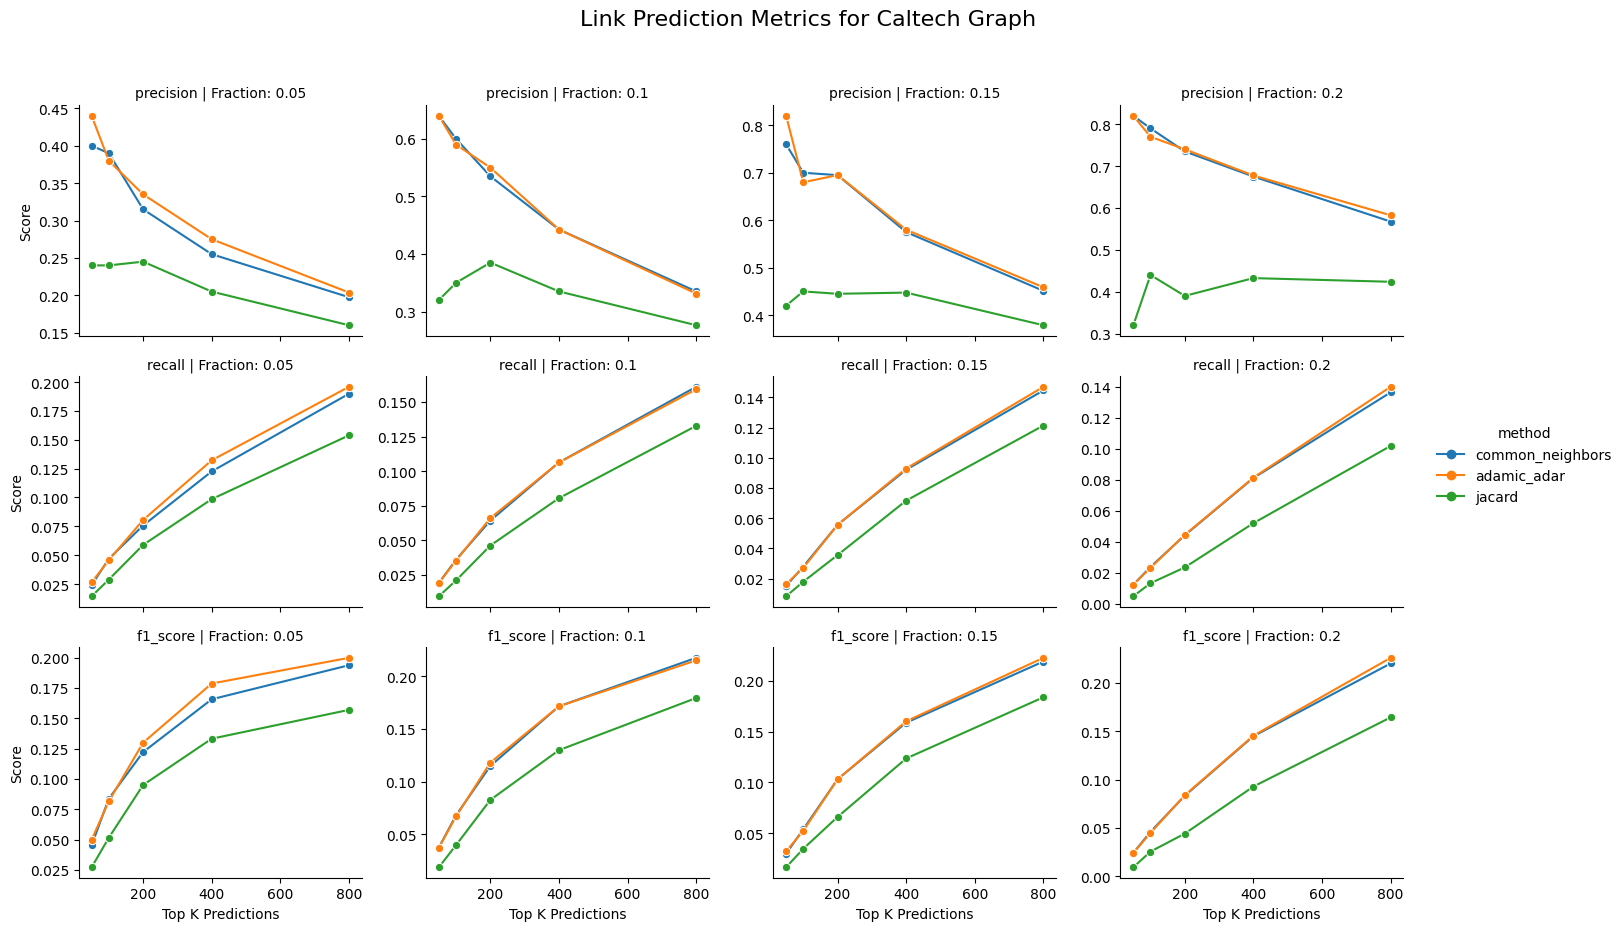

In [ ]:
plot_edge_prediction_result(result_caltech, 'Caltech')

In [ ]:
G_reed = nx.read_gml(data_dir+'Reed98.gml')
result_reed = edge_prediction_evaluation(G_reed)

computing for fracition = 0.05
computing for fracition = 0.1
computing for fracition = 0.15
computing for fracition = 0.2


In [ ]:
print(f'number of nodes = {len(G_reed)}')
print(f'number of edges = {G_reed.number_of_edges()}')

number of nodes = 962
number of edges = 18812


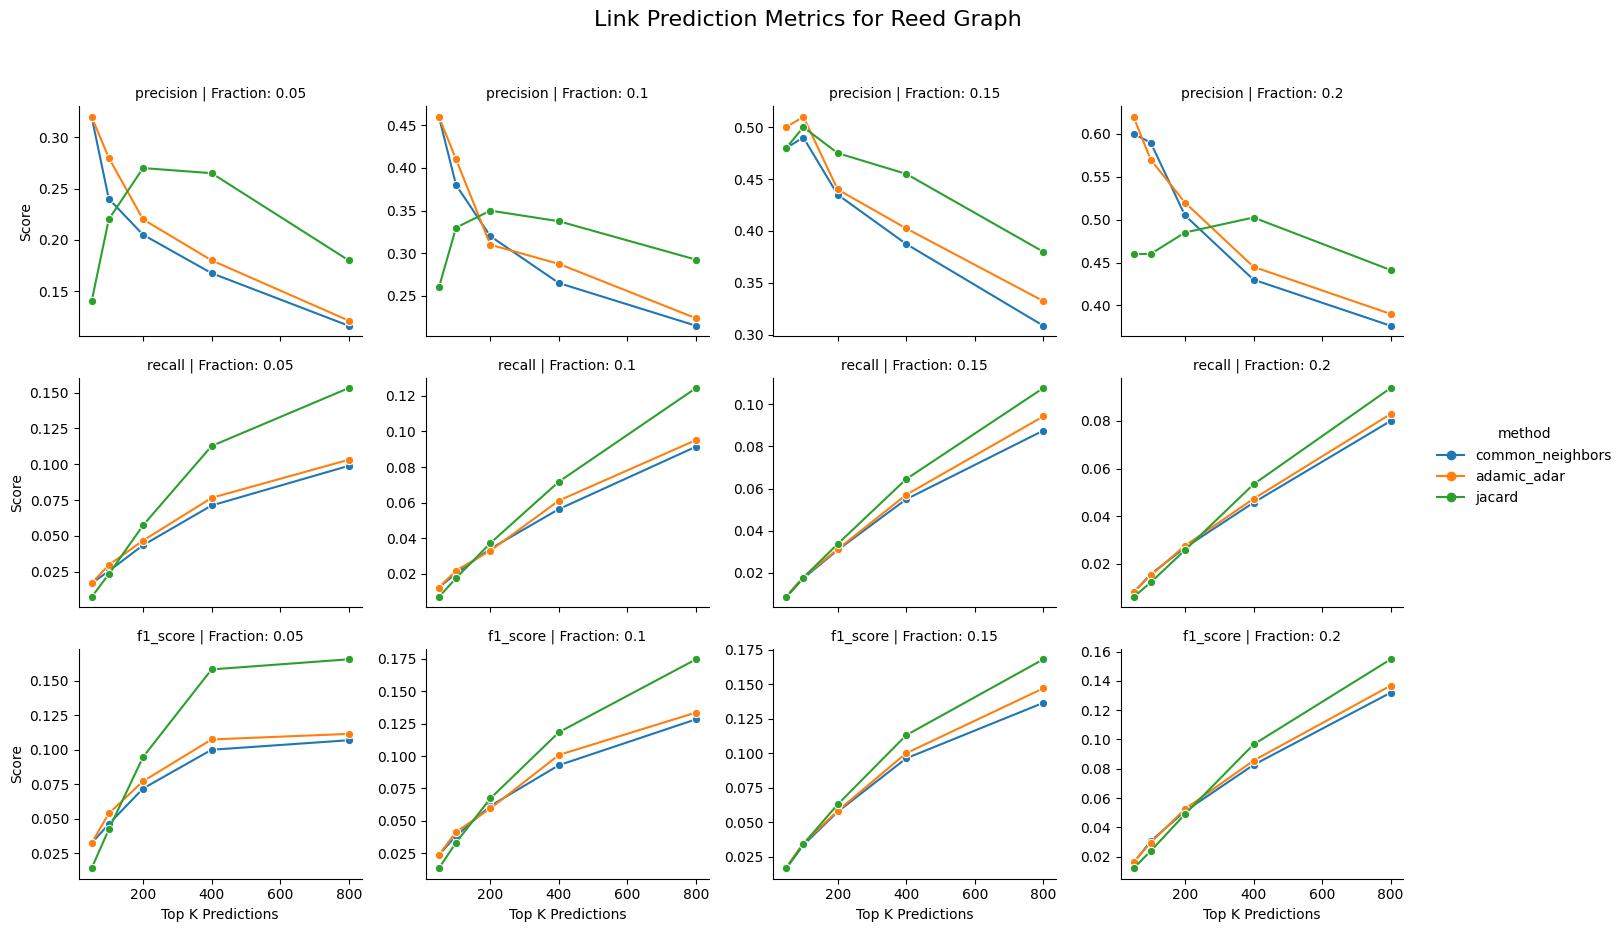

In [ ]:
plot_edge_prediction_result(result_reed, 'Reed')

In [ ]:
G_simmons = nx.read_gml(data_dir+'Simmons81.gml')
result_simmons = edge_prediction_evaluation(G_simmons)

computing for fracition = 0.05
computing for fracition = 0.1
computing for fracition = 0.15
computing for fracition = 0.2


In [ ]:
print(f'number of nodes = {len(G_simmons)}')
print(f'number of edges = {G_simmons.number_of_edges()}')

number of nodes = 1518
number of edges = 32988


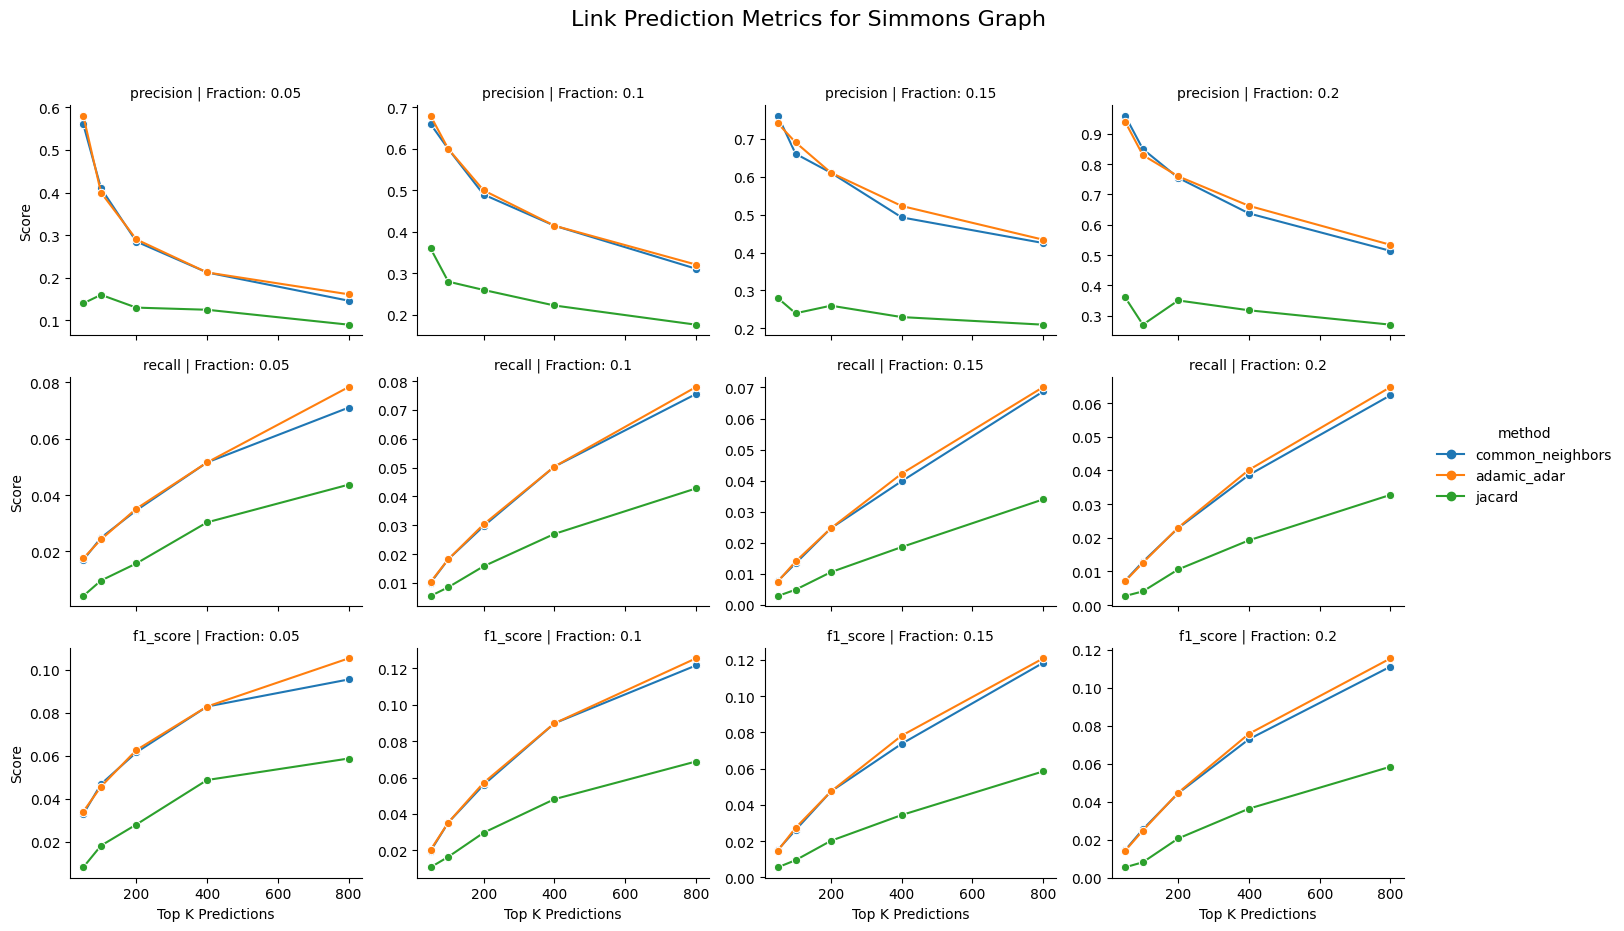

In [ ]:
plot_edge_prediction_result(result_simmons, 'Simmons')

#Q5: Finding Missing labels via Label propagation

In [ ]:
def label_propagation(graph, labels, mask, max_iter=5000):

    '''
    This function performs the label propagation algorithm.
    Args:
    graph (networkx.Graph): The input graph for label propagation.
    labels (torch.Tensor): The initial labels for nodes.
    mask (torch.Tensor): A binary mask indicating which nodes to label.
    max_iter (int): The maximum number of iterations for label propagation.
    Returns:
    Y_new (torch.Tensor): The final labels after label propagation.
    '''

    A = torch.from_numpy(nx.adjacency_matrix(graph).todense()).float()
    # Adding the self loop
    A_hat = A + torch.eye(A.shape[0])
    # Normalizing
    D_diag = torch.sum(A_hat, dim=1)
    P = A_hat / D_diag.unsqueeze(1)
    # Label Initializing
    Y = labels.clone().float()
    Y[~mask] = 0             # Set hidden labels to 0
    Y_GT = Y[mask].clone()   # The Ground Truth

    # Iteration
    for i in range(max_iter):
        Y_new = torch.mm(P, Y)
        Y_new[mask] = Y_GT
        if torch.allclose(Y_new, Y, atol=1e-6):
            print(f"Converged at iteration {i}")
            break
        Y = Y_new

    return Y_new



In [ ]:
def oneHot_encoding_label_matrix(G, attribute_dict, encoding_dict):

    '''
    This function performs one-hot encoding on the labels.
    Args:
    G (networkx.Graph): The input graph for label propagation.
    attribute_dict (dict): A dictionary mapping nodes to their labels.
    encoding_dict (dict): A dictionary mapping labels to their indices.
    Returns:
    Y (torch.Tensor): The one-hot encoded labels.
    '''
    nodes = list(G.nodes())
    num_nodes = len(nodes)
    num_classes = len(encoding_dict)

    Y = torch.zeros((num_nodes, num_classes))
    for i, node in enumerate(nodes):
        val = attribute_dict.get(node)
        if val is not None and val in encoding_dict:
            label_idx = encoding_dict[val]
            Y[i, label_idx] = 1.0

    return Y


In [ ]:

def calculate_accuracy(Y_pred, Y_true, mask):

    '''
    This function calculates the accuracy of the label propagation.
    Args:
    Y_pred (torch.Tensor): The predicted labels.
    Y_true (torch.Tensor): The true labels.
    mask (torch.Tensor): A binary mask indicating which nodes to consider (the nodes that were removed for testing)
    Returns:
    accuracy (float): The accuracy of the label propagation.
    '''
    # Only look at the hidden nodes (where mask is False)
    hidden_indices = ~mask

    # Convert probabilities to class indices
    pred_labels = torch.argmax(Y_pred[hidden_indices], dim=1)
    true_labels = torch.argmax(Y_true[hidden_indices], dim=1)

    # Calculate percentage of correct matches
    correct = (pred_labels == true_labels).sum().item()
    total = hidden_indices.sum().item()


    return correct / total


In [ ]:
def label_extraction(G):

  '''
  This function extracts the nodes' labels from the graph.
  Args:
  G (networkx.Graph): The input graph for label propagation.
  Returns:
  labels (list): A list of one-hot encoded labels.
  '''
  attribute_dorm = nx.get_node_attributes(G, 'dorm')
  attribute_gender = nx.get_node_attributes(G, 'gender')
  attribute_major = nx.get_node_attributes(G, 'major_index')
  attribute_year = nx.get_node_attributes(G, 'year')

  attribute_dorm_encode = {value: key for key, value in enumerate(sorted(set(attribute_dorm.values())))}
  attribute_gender_encode = {value: key for key, value in enumerate(sorted(set(attribute_gender.values())))}
  attribute_major_encode = {value: key for key, value in enumerate(sorted(set(attribute_major.values())))}
  attribute_year_encode = {value: key for key, value in enumerate(sorted(set(attribute_year.values())))}
  labels = []
  # One-hot encoding the labels using the defined "oneHot_encoding_label_matrix" function
  labels_dorm = oneHot_encoding_label_matrix(G, attribute_dorm, attribute_dorm_encode)
  labels_gender = oneHot_encoding_label_matrix(G, attribute_gender, attribute_gender_encode)
  labels_major = oneHot_encoding_label_matrix(G, attribute_major, attribute_major_encode)
  labels_year = oneHot_encoding_label_matrix(G, attribute_year, attribute_year_encode)
  labels.append(labels_dorm)
  labels.append(labels_gender)
  labels.append(labels_major)
  labels.append(labels_year)

  return labels

In [ ]:
data_dir = '/content/drive/MyDrive/fb100/data/'
G_caltech = nx.read_gml(data_dir+'Caltech36.gml')
G_simmons = nx.read_gml(data_dir+'Simmons81.gml')
G_duke = nx.read_gml(data_dir+'Duke14.gml')

## Caltech

In [ ]:
labels = label_extraction(G_caltech)
removal_fraction = [0.1, 0.2, 0.3]
num_nodes = len(G_caltech.nodes())
removal_masks = []
for frac in removal_fraction:
  mask = torch.ones(num_nodes, dtype=torch.bool)
  mask[np.random.choice(num_nodes, int(frac * num_nodes), replace=False)] = False
  removal_masks.append(mask)


In [ ]:
attributes = ['Dorm', 'Gender', 'Major', 'Year']
for i in range(len(labels)):
  print(f'----- Attribute {attributes[i]} -----')
  for j in range(len(removal_masks)):
    Y_pred = label_propagation(G_caltech, labels[i], removal_masks[j])
    accuracy = calculate_accuracy(Y_pred, labels[i], removal_masks[j])
    print(f"Accuracy for {removal_fraction[j] * 100}% removal: {accuracy:.2%}")

----- Attribute Dorm -----
Converged at iteration 16
Accuracy for 10.0% removal: 75.00%
Converged at iteration 18
Accuracy for 20.0% removal: 73.86%
Converged at iteration 25
Accuracy for 30.0% removal: 73.04%
----- Attribute Gender -----
Converged at iteration 16
Accuracy for 10.0% removal: 59.21%
Converged at iteration 18
Accuracy for 20.0% removal: 58.17%
Converged at iteration 25
Accuracy for 30.0% removal: 58.70%
----- Attribute Major -----
Converged at iteration 16
Accuracy for 10.0% removal: 32.89%
Converged at iteration 18
Accuracy for 20.0% removal: 18.95%
Converged at iteration 25
Accuracy for 30.0% removal: 19.13%
----- Attribute Year -----
Converged at iteration 16
Accuracy for 10.0% removal: 61.84%
Converged at iteration 18
Accuracy for 20.0% removal: 65.36%
Converged at iteration 25
Accuracy for 30.0% removal: 61.74%


##Simmons

In [ ]:
labels = label_extraction(G_simmons)
removal_fraction = [0.1, 0.2, 0.3]
num_nodes = len(G_simmons.nodes())
removal_masks = []
for frac in removal_fraction:
  mask = torch.ones(num_nodes, dtype=torch.bool)
  mask[np.random.choice(num_nodes, int(frac * num_nodes), replace=False)] = False
  removal_masks.append(mask)

In [ ]:
attributes = ['Dorm', 'Gender', 'Major', 'Year']
for i in range(len(labels)):
  print(f'----- Attribute {attributes[i]} -----')
  for j in range(len(removal_masks)):
    Y_pred = label_propagation(G_simmons, labels[i], removal_masks[j])
    accuracy = calculate_accuracy(Y_pred, labels[i], removal_masks[j])
    print(f"Accuracy for {removal_fraction[j] * 100}% removal: {accuracy:.2%}")

----- Attribute Dorm -----
Converged at iteration 16
Accuracy for 10.0% removal: 52.98%
Converged at iteration 54
Accuracy for 20.0% removal: 53.14%
Converged at iteration 19
Accuracy for 30.0% removal: 50.11%
----- Attribute Gender -----
Converged at iteration 16
Accuracy for 10.0% removal: 90.73%
Converged at iteration 54
Accuracy for 20.0% removal: 93.73%
Converged at iteration 20
Accuracy for 30.0% removal: 90.99%
----- Attribute Major -----
Converged at iteration 16
Accuracy for 10.0% removal: 30.46%
Converged at iteration 54
Accuracy for 20.0% removal: 27.06%
Converged at iteration 19
Accuracy for 30.0% removal: 26.59%
----- Attribute Year -----
Converged at iteration 16
Accuracy for 10.0% removal: 76.16%
Converged at iteration 54
Accuracy for 20.0% removal: 77.23%
Converged at iteration 19
Accuracy for 30.0% removal: 75.38%


##Duke

In [ ]:
labels = label_extraction(G_duke)
removal_fraction = [0.1, 0.2, 0.3]
num_nodes = len(G_duke.nodes())
removal_masks = []
for frac in removal_fraction:
  mask = torch.ones(num_nodes, dtype=torch.bool)
  mask[np.random.choice(num_nodes, int(frac * num_nodes), replace=False)] = False
  removal_masks.append(mask)

In [ ]:
attributes = ['Dorm', 'Gender', 'Major', 'Year']
for i in range(len(labels)):
  print(f'----- Attribute {attributes[i]} -----')
  for j in range(len(removal_masks)):
    Y_pred = label_propagation(G_duke, labels[i], removal_masks[j])
    accuracy = calculate_accuracy(Y_pred, labels[i], removal_masks[j])
    print(f"Accuracy for {removal_fraction[j] * 100}% removal: {accuracy:.2%}")

----- Attribute Dorm -----
Converged at iteration 17
Accuracy for 10.0% removal: 48.43%
Converged at iteration 54
Accuracy for 20.0% removal: 48.36%
Converged at iteration 38
Accuracy for 30.0% removal: 49.26%
----- Attribute Gender -----
Converged at iteration 17
Accuracy for 10.0% removal: 61.48%
Converged at iteration 54
Accuracy for 20.0% removal: 61.19%
Converged at iteration 38
Accuracy for 30.0% removal: 61.93%
----- Attribute Major -----
Converged at iteration 16
Accuracy for 10.0% removal: 30.23%
Converged at iteration 54
Accuracy for 20.0% removal: 28.95%
Converged at iteration 38
Accuracy for 30.0% removal: 25.64%
----- Attribute Year -----
Converged at iteration 17
Accuracy for 10.0% removal: 82.10%
Converged at iteration 54
Accuracy for 20.0% removal: 81.51%
Converged at iteration 38
Accuracy for 30.0% removal: 80.39%


#Q6: Community Detection

In [ ]:
data_dir = '/content/drive/MyDrive/fb100/data/'

##Private

In [ ]:
G_caltech = nx.read_gml(data_dir+'Caltech36.gml')
G_reed = nx.read_gml(data_dir+'Reed98.gml')
G_simmons = nx.read_gml(data_dir+'Simmons81.gml')
G_swarthmore = nx.read_gml(data_dir+'Swarthmore42.gml')
G_wellesley = nx.read_gml(data_dir+'Wellesley22.gml')
G_dartmouth = nx.read_gml(data_dir+'Dartmouth6.gml')
G_rice = nx.read_gml(data_dir+'Rice31.gml')
G_princeton = nx.read_gml(data_dir+'Princeton12.gml')
G_mit = nx.read_gml(data_dir+'MIT8.gml')
G_stanford = nx.read_gml(data_dir+'Stanford3.gml')
G_yale = nx.read_gml(data_dir+'Yale4.gml')
G_harvard = nx.read_gml(data_dir+'Harvard1.gml')
G_upenn = nx.read_gml(data_dir+'UPenn7.gml')
G_cornell = nx.read_gml(data_dir+'Cornell5.gml')
G_nyu = nx.read_gml(data_dir+'NYU9.gml')

In [ ]:
communities_caltech = community.louvain_communities(G_caltech)
communities_reed = community.louvain_communities(G_reed)
communities_simmons = community.louvain_communities(G_simmons)
communities_swarthmore = community.louvain_communities(G_swarthmore)
communities_wellesley = community.louvain_communities(G_wellesley)
communities_dartmouth = community.louvain_communities(G_dartmouth)
communities_rice = community.louvain_communities(G_rice)
communities_princeton = community.louvain_communities(G_princeton)
communities_mit = community.louvain_communities(G_mit)
communities_stanford = community.louvain_communities(G_stanford)
communities_yale = community.louvain_communities(G_yale)
communities_harvard = community.louvain_communities(G_harvard)
communities_upenn = community.louvain_communities(G_upenn)
communities_cornell = community.louvain_communities(G_cornell)
communities_nyu = community.louvain_communities(G_nyu)

##Public

In [ ]:
G_william = nx.read_gml(data_dir+'William77.gml')
G_vermont = nx.read_gml(data_dir+'Vermont70.gml')
G_binghamton = nx.read_gml(data_dir+'Bingham82.gml')
G_uva = nx.read_gml(data_dir+'UVA16.gml')
G_unc = nx.read_gml(data_dir+'UNC28.gml')
G_umass = nx.read_gml(data_dir+'Amherst41.gml')
G_berkeley = nx.read_gml(data_dir+'Berkeley13.gml')
G_maryland = nx.read_gml(data_dir+'Maryland58.gml')
G_michigan = nx.read_gml(data_dir+'Michigan23.gml')
G_texas = nx.read_gml(data_dir+'Texas84.gml')
G_uf = nx.read_gml(data_dir+'UF21.gml')

In [ ]:
communities_william = community.louvain_communities(G_william)
communities_vermont = community.louvain_communities(G_vermont)
communities_binghamton = community.louvain_communities(G_binghamton)
communities_uva = community.louvain_communities(G_uva)
communities_unc = community.louvain_communities(G_unc)
communities_umass = community.louvain_communities(G_umass)
communities_berkeley = community.louvain_communities(G_berkeley)
communities_maryland = community.louvain_communities(G_maryland)
communities_michigan = community.louvain_communities(G_michigan)
communities_texas = community.louvain_communities(G_texas)
communities_uf = community.louvain_communities(G_uf)


## Evaluation

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np

def evaluate_community_drivers(graph, communities):

    '''
    This function calculates the ARI score to compare the communities (based on Louvain) and
    the nodes that can be clustered based on "attribute" simmilariy. This reflects the important drivers
    for community formation.
    Args:
    graph (networkx.Graph): The input graph for community detection.
    communities (list): A list of communities (Louvin community detection result for the graph)
    Returns:
    ari_results (dict): A dictionary containing the ARI scores for each attribute.
    '''

    attribute_names = set()
    for node, data in graph.nodes(data=True):
      for attr_name in data.keys():
        attribute_names.add(attr_name)

    nodes_list = sorted(list(graph.nodes()))
    num_nodes = len(nodes_list)

    detected_community_labels = np.zeros(num_nodes, dtype=int)
    node_to_community_id = {}
    for i, comm in enumerate(communities):
        for node in comm:
            node_to_community_id[node] = i

    for i, node in enumerate(nodes_list):
        detected_community_labels[i] = node_to_community_id.get(node, -1)

    ari_results = {}

    for attr_name in attribute_names:
        attribute_values = nx.get_node_attributes(graph, attr_name)

        unique_attr_values = sorted(list(set(attribute_values.values())))
        attr_value_to_label = {val: i for i, val in enumerate(unique_attr_values)}

        attribute_labels = np.zeros(num_nodes, dtype=int)
        valid_node_indices = []

        for i, node in enumerate(nodes_list):
            val = attribute_values.get(node)
            if val is not None:
                attribute_labels[i] = attr_value_to_label[val]
                valid_node_indices.append(i)
            else:
                attribute_labels[i] = -2

        if len(valid_node_indices) > 1:
            filtered_detected_labels = detected_community_labels[valid_node_indices]
            filtered_attribute_labels = attribute_labels[valid_node_indices]

            ari_score = adjusted_rand_score(filtered_detected_labels, filtered_attribute_labels)
            ari_results[attr_name] = ari_score
        else:
            ari_results[attr_name] = np.nan
    return ari_results

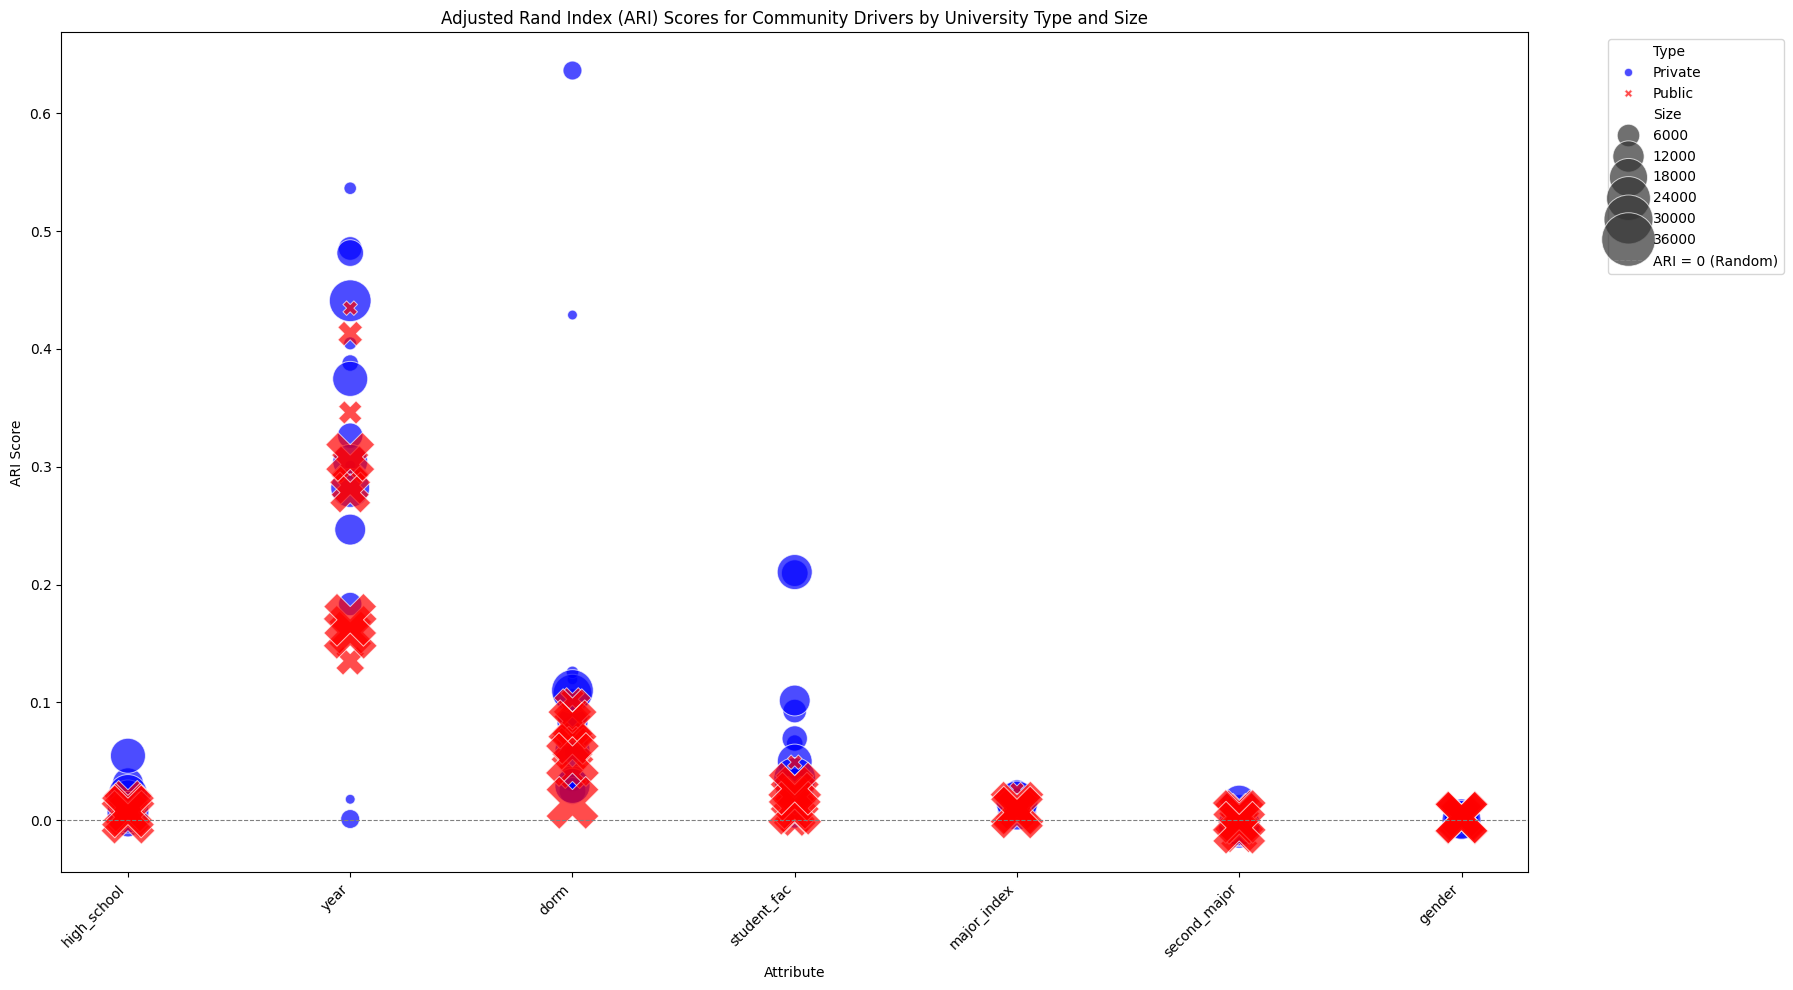

In [ ]:
import seaborn as sns

# Define private and public university lists
private_universities = {
    'Caltech': (G_caltech, communities_caltech),
    'Reed': (G_reed, communities_reed),
    'Simmons': (G_simmons, communities_simmons),
    'Swarthmore': (G_swarthmore, communities_swarthmore),
    'Wellesley': (G_wellesley, communities_wellesley),
    'Dartmouth': (G_dartmouth, communities_dartmouth),
    'Rice': (G_rice, communities_rice),
    'Princeton': (G_princeton, communities_princeton),
    'MIT': (G_mit, communities_mit),
    'Stanford': (G_stanford, communities_stanford),
    'Yale': (G_yale, communities_yale),
    'Harvard': (G_harvard, communities_harvard),
    'UPenn': (G_upenn, communities_upenn),
    'Cornell': (G_cornell, communities_cornell),
    'NYU': (G_nyu, communities_nyu)
}

public_universities = {
    'William': (G_william, communities_william),
    'Vermont': (G_vermont, communities_vermont),
    'Binghamton': (G_binghamton, communities_binghamton),
    'UVA': (G_uva, communities_uva),
    'UNC': (G_unc, communities_unc),
    'UMass': (G_umass, communities_umass),
    'Berkeley': (G_berkeley, communities_berkeley),
    'Maryland': (G_maryland, communities_maryland),
    'Michigan': (G_michigan, communities_michigan),
    'Texas': (G_texas, communities_texas),
    'UF': (G_uf, communities_uf)
}

all_results = []

# Process private universities
for name, (graph, communities) in private_universities.items():
    ari_scores = evaluate_community_drivers(graph, communities)
    for attr, score in ari_scores.items():
        all_results.append({
            'University': name,
            'Type': 'Private',
            'Attribute': attr,
            'ARI Score': score,
            'Size': len(graph.nodes())
        })

# Process public universities
for name, (graph, communities) in public_universities.items():
    ari_scores = evaluate_community_drivers(graph, communities)
    for attr, score in ari_scores.items():
        all_results.append({
            'University': name,
            'Type': 'Public',
            'Attribute': attr,
            'ARI Score': score,
            'Size': len(graph.nodes())
        })

df_combined_ari = pd.DataFrame(all_results)
df_combined_ari = df_combined_ari.dropna(subset=['ARI Score'])

# Filter out attributes that have a value of zero or near zero, as they don't contribute meaningfully
df_combined_ari = df_combined_ari[df_combined_ari['ARI Score'].abs() > 1e-4]

# Create the plot
plt.figure(figsize=(18, 10))
sns.scatterplot(
    data=df_combined_ari,
    x='Attribute',
    y='ARI Score',
    hue='Type',          # Color by Public/Private
    size='Size',         # Size by number of nodes
    sizes=(50, 1500),
    style='Type',        # Use style to differentiate points
    palette={'Private': 'blue', 'Public': 'red'},
    alpha=0.7
)

plt.title('Adjusted Rand Index (ARI) Scores for Community Drivers by University Type and Size')
plt.xlabel('Attribute')
plt.ylabel('ARI Score')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8, label='ARI = 0 (Random)')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()